<div class="alert alert-block alert-info">
<center> <h1> MSc in Data Science and Advanced Analytics </h1> </center> <br>
<center> DATA MINING PROJECT 2024/2025 </center>

# ABCDEATS Inc. - Group 02

|   | Student Name   |    Student ID | 
|---|----------------|      ---      |
| 1 | Afonso Gião    |   20240495   | 
| 2 | Bruna Duarte   |    20210669   |  
| 3 | Catarina Silva |   20240558   | 
| 4 | Sarah Leuthner |   20240581   | 

# Table of Contents

* [<font color='#52b69a'>1 - Business Understanding </font>](#first-bullet) <br>

* [<font color='#52b69a'>2 - Data Integration </font>](#second-bullet) <br>
    - [2.1. Import Libraries ](#2.1)<br>
    - [2.2. Import Data ](#2.2)<br>
        - 2.2.1. [Metadata ](#2.2.1)<br>

* [<font color='#52b69a'>3 - Data Exploration </font>](#third-bullet) <br>
    - [3.1. Exploratory Data Analysis  ](#3.1) <br>
        - 3.1.1. [Descriptive Statistics](#3.1.1)<br>
    - [3.2. Features' Distributions  ](#3.2) <br>
    - [3.3. Outliers Check  ](#3.3) <br>

* [<font color='#52b69a'>4 - Data Preprocessing</font>](#forth-bullet) <br>
    - [4.1. Handling Troublesome Values ](#4.1)<br>
    - [4.2. First Outliers Treatment ](#4.2)<br>
    - [4.3. Feature Engineering](#4.3)<br>
    - [4.4. Feature Selection ](#4.4)<br>
    - [4.5. Scaling ](#4.5)<br>
    - [4.6. Second Outliers Treatment ](#4.6)<br>

* [<font color='#52b69a'>5 - Clustering</font>](#fifth-bullet) <br>
    - 5.1.[Kmeans Clustering  ](#5.1)<br>
    - 5.2.[K-means Clustering with Perspectives](#5.2)<br>
    - 5.3.[Hierarchical clustering ](#5.3)<br>
    - 5.4.[DBSCAN clustering ](#5.4)<br>
    - 5.5.[Self Organizing Maps ](#5.5)<br>
        - 5.5.1.[K-Means on top of SOM units ](#5.5.1)<br>
        - 5.5.2.[Hierarchical Clustering on top of SOM units ](#5.5.2)<br>
    - 5.6.[K-Means Hierarchical Hybrid ](#5.6)<br>
    - 5.7.[Gaussian Mixture Model ](#5.7)<br>
    - 5.4.[K-prototype ](#5.4)<br>
     
* [<font color='#52b69a'>6 - Clusters Analysis & Profiling </font>](#sixth-bullet) <br>
    - 6.1.[t-SNE Visualization ](#6.1)<br>
    - 6.2.[UMAP Visualization ](#6.2)<br>
    - 6.3.[Decision Tree: Assess the accuracy & Visualize ](#6.3)<br>
    - 6.4.[Cluster Profiling ](#6.4)<br>

<a class="anchor" id="first-bullet">

# 1. Business Understanding

ABCDEats Inc., a food delivery service, operates in a dynamic market where consumers are increasingly selective about their spending habits. To thrive in this competitive environment, the company must align its strategies with the diverse preferences and needs of its customer base.

**Business Challenge**

Understanding customer behavior is essential for delivering personalized services and achieving sustainable growth. By segmenting its customer base, ABCDEats Inc. can:

* Identify patterns in customer preferences and behavior.
* Develop tailored marketing and operational strategies.
* Enhance customer satisfaction and retention through personalized services.

**Objective**

The main goal of this project is to apply customer segmentation techniques to uncover descriptive patterns and behavioral insights within the customer base. The findings will:

* Classify customers into segments based on their spending habits, order preferences, and demographics.
* Inform the development of personalized strategies to cater to each segment effectively.
* Enable the company to refine its service offerings and improve its targeting of future customers.

<a class="anchor" id="second-bullet">     

# 2. Data Integration

## 2.1  Import Libraries <a class="anchor" id="2.1"></a>

In [68]:
import warnings

from numpy.ma.core import repeat

# hiding the warnings
warnings.filterwarnings('ignore')
import os, sys

sys.stderr = open(os.devnull, "w")  # silence stderr
sys.stderr = sys.__stderr__  # unsilence stderr

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

# setting the style of seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})

## 2.2 Import Data <a class="anchor" id="2.2"></a>

In [69]:
# Importing the dataset
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv')

### 2.2.1 Metadata <a class="anchor" id="2.2.1"></a>

- *customer_id* - Unique identifier for each customer.
- *customer_region* - geographic region where the customer is located.
- *customer_age* - Age of the customer.
- *vendor_count* - Number of unique vendors the customer has ordered from.
- *product_count* - Total number of products the customer has ordered.
- *is_chain* - Indicates whether the customer’s order was from a chain restaurant.
- *first_order* - Number of days from the start of the dataset when the customer first placed an order.
- *last_order* - Number of days from the start of the dataset when the customer most recently placed an order.
- *last_promo* - The category of the promotion or discount most recently used by the customer.
- *payment_method* - Method most recently used by the customer to pay for their orders.
- *CUI_American*, *CUI_Asian*, *CUI_Chinese*, *CUI_Italian*, etc. - The amount in monetary units spent by the customer from the indicated type of cuisine.
- *DOW_0* to *DOW_6* - Number of orders placed on each day of the week (0 = Sunday, 6 = Saturday).
- *HR_0* to *HR_23* - Number of orders placed during each hour of the day (0 = midnight, 23 = 11 PM).

<a class="anchor" id="third-bullet">     

# 3. Data exploration

## 3.1. Exploratory Data Analysis <a class="anchor" id="3.1"></a>

In [70]:
print(f'The dataframe has {df.shape[0]} rows and {df.shape[1]} columns')

The dataframe has 31888 rows and 56 columns


In [71]:
print('There are {} observations and {} features in the dataset'.format(df.shape[0], df.shape[1]))

There are 31888 observations and 56 features in the dataset


In [72]:
# Indexing by customer_id
df.set_index('customer_id',inplace=True)

### 3.1.1 Descriptive Statistics <a class="anchor" id="3.1.1"></a>

In [73]:
# Descriptive statistics for numerical columns except for the cuisine, HR and DOW columns
df[['customer_age', 'vendor_count', 'product_count', "is_chain", 'first_order', 'last_order']].describe().round(2)

,customer_age,vendor_count,product_count,is_chain,first_order,last_order
count,31161.00,31888.00,31888.00,31888.00,31782.00,31888.00
mean,27.51,3.10,5.67,2.82,28.48,63.68
std,7.16,2.77,6.96,3.98,24.11,23.23
min,15.00,0.00,0.00,0.00,0.00,0.00
25%,23.00,1.00,2.00,1.00,7.00,49.00
50%,26.00,2.00,3.00,2.00,22.00,70.00
75%,31.00,4.00,7.00,3.00,45.00,83.00
max,80.00,41.00,269.00,83.00,90.00,90.00


In [74]:
# Descriptive statistics for the categorical columns
df.describe(include = "object")

,customer_region,last_promo,payment_method
count,31888,31888,31888
unique,9,4,3
top,8670,-,CARD
freq,9761,16748,20161


Categorical columns, can be analyzed using frequency counts:

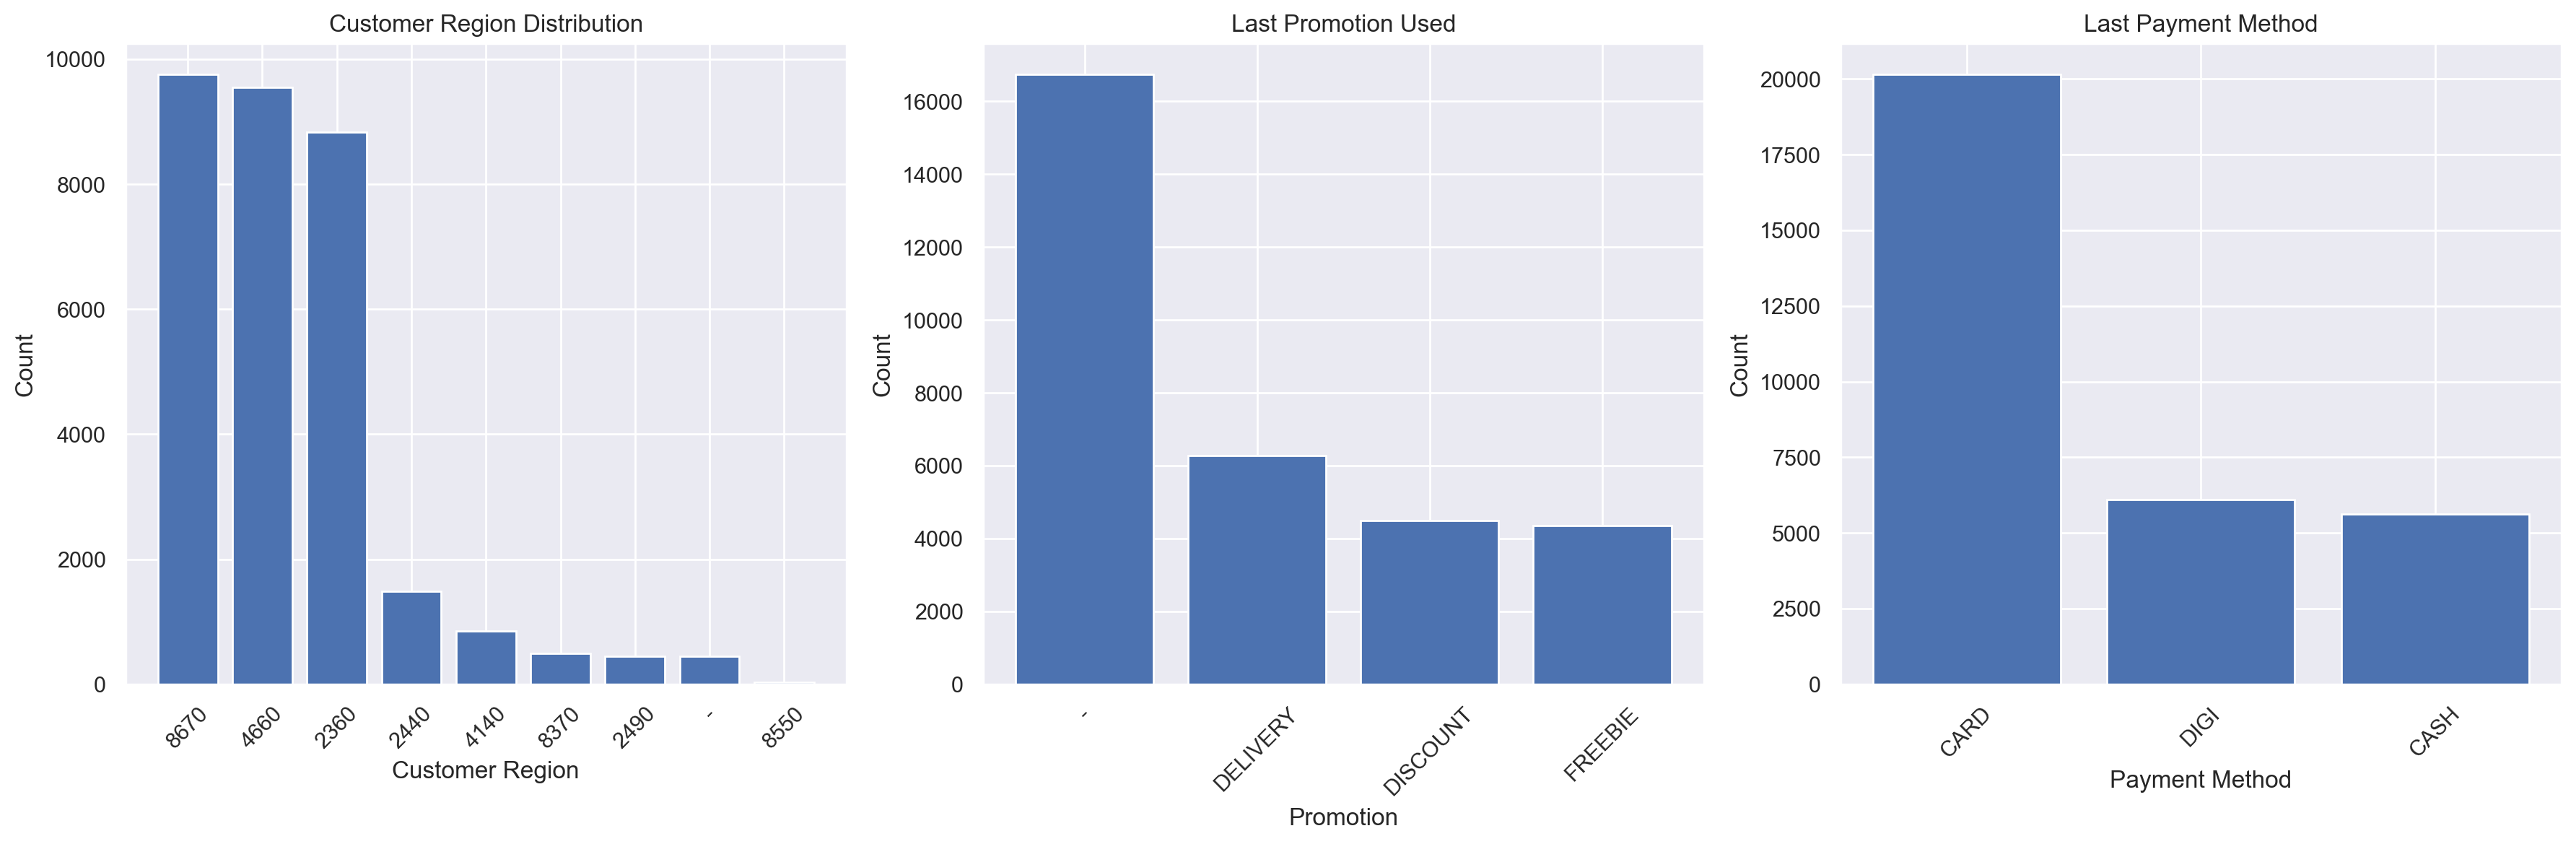

In [75]:
# Creating a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting the first bar chart: Customer Region
value_counts1 = df["customer_region"].value_counts()
axes[0].bar(value_counts1.index, value_counts1)
axes[0].set_title('Customer Region Distribution')
axes[0].set_xlabel('Customer Region')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plotting the second bar chart: Last Promotion Used
value_counts2 = df["last_promo"].value_counts()
axes[1].bar(value_counts2.index, value_counts2)
axes[1].set_title('Last Promotion Used')
axes[1].set_xlabel('Promotion')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Plotting the third bar chart: Last Payment Method Used
value_counts3 = df["payment_method"].value_counts()
axes[2].bar(value_counts3.index, value_counts3)
axes[2].set_title('Last Payment Method')
axes[2].set_xlabel('Payment Method')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

### Cuisine Analysis

In [76]:
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]

In [77]:
# Descriptive statistics for the cuisine columns
df[cuisine_columns].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CUI_American,31888.0,4.88,11.65,0.0,0.0,0.0,5.66,280.21
CUI_Asian,31888.0,9.96,23.56,0.0,0.0,0.0,11.83,896.71
CUI_Beverages,31888.0,2.30,8.48,0.0,0.0,0.0,0.00,229.22
CUI_Cafe,31888.0,0.80,6.43,0.0,0.0,0.0,0.00,326.10
CUI_Chicken Dishes,31888.0,0.77,3.66,0.0,0.0,0.0,0.00,219.66
CUI_Chinese,31888.0,1.43,8.19,0.0,0.0,0.0,0.00,739.73
CUI_Desserts,31888.0,0.88,5.26,0.0,0.0,0.0,0.00,230.07
CUI_Healthy,31888.0,0.95,5.83,0.0,0.0,0.0,0.00,255.81
CUI_Indian,31888.0,1.63,7.44,0.0,0.0,0.0,0.00,309.07
CUI_Italian,31888.0,3.23,11.25,0.0,0.0,0.0,0.00,468.33


### Asian Cuisine

Let's compare the popularity of the most well-known cuisines in the asian continent: Japanese, Indian, Chinese and Thai.

Text(0.5, 0, 'Cuisines')

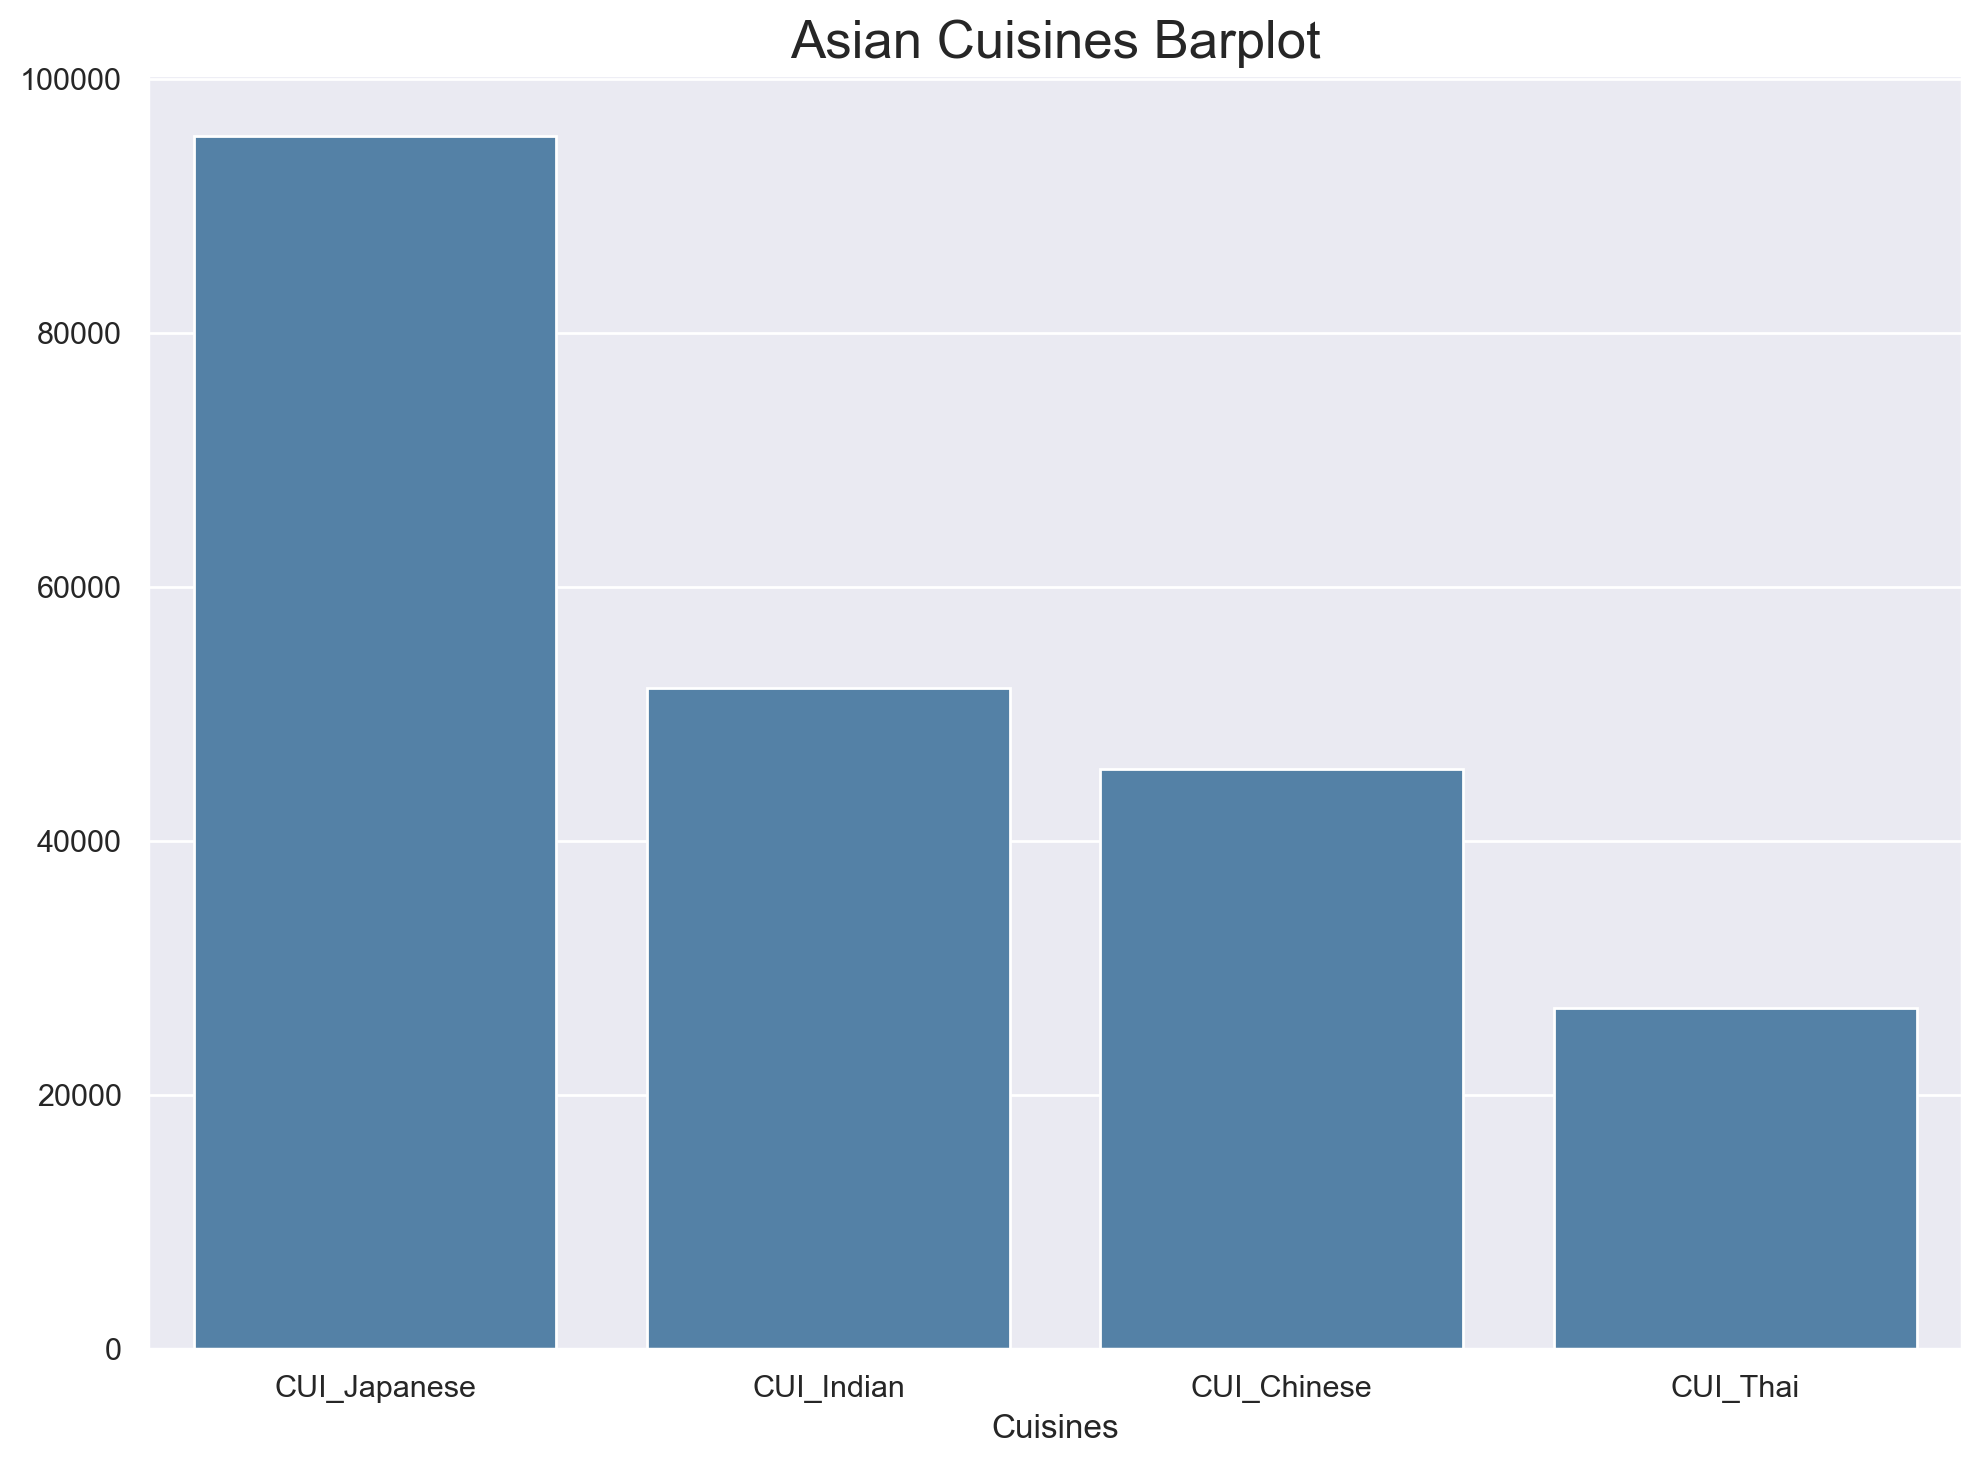

In [78]:
# Sum of the money spent in the 4 main asian cuisines
asian_cuisine_sums = df[['CUI_Japanese', 'CUI_Indian', 'CUI_Chinese', 'CUI_Thai']].sum()

# Plotting a bar chart for the 4 main asian cuisines
sns.barplot(x=asian_cuisine_sums.index, y=asian_cuisine_sums.values, color='steelblue')
plt.title("Asian Cuisines Barplot", size = 19)
plt.xlabel("Cuisines")

**Japanese** cuisine has the highest amount of money spent by a huge margin, among the 4 main asian cuisines. 
It is almost double the money spent in each of the other 3 cuisines. 
This makes sense given the popularity of japanese food and the higher average cost compared to other asian cuisines.

* **Asian Cuisine VS. The 4 Main Asian Cuisines**

Let's compare the total spending in Asian cuisine with the total spending in the 4 main asian cuisines we saw before.

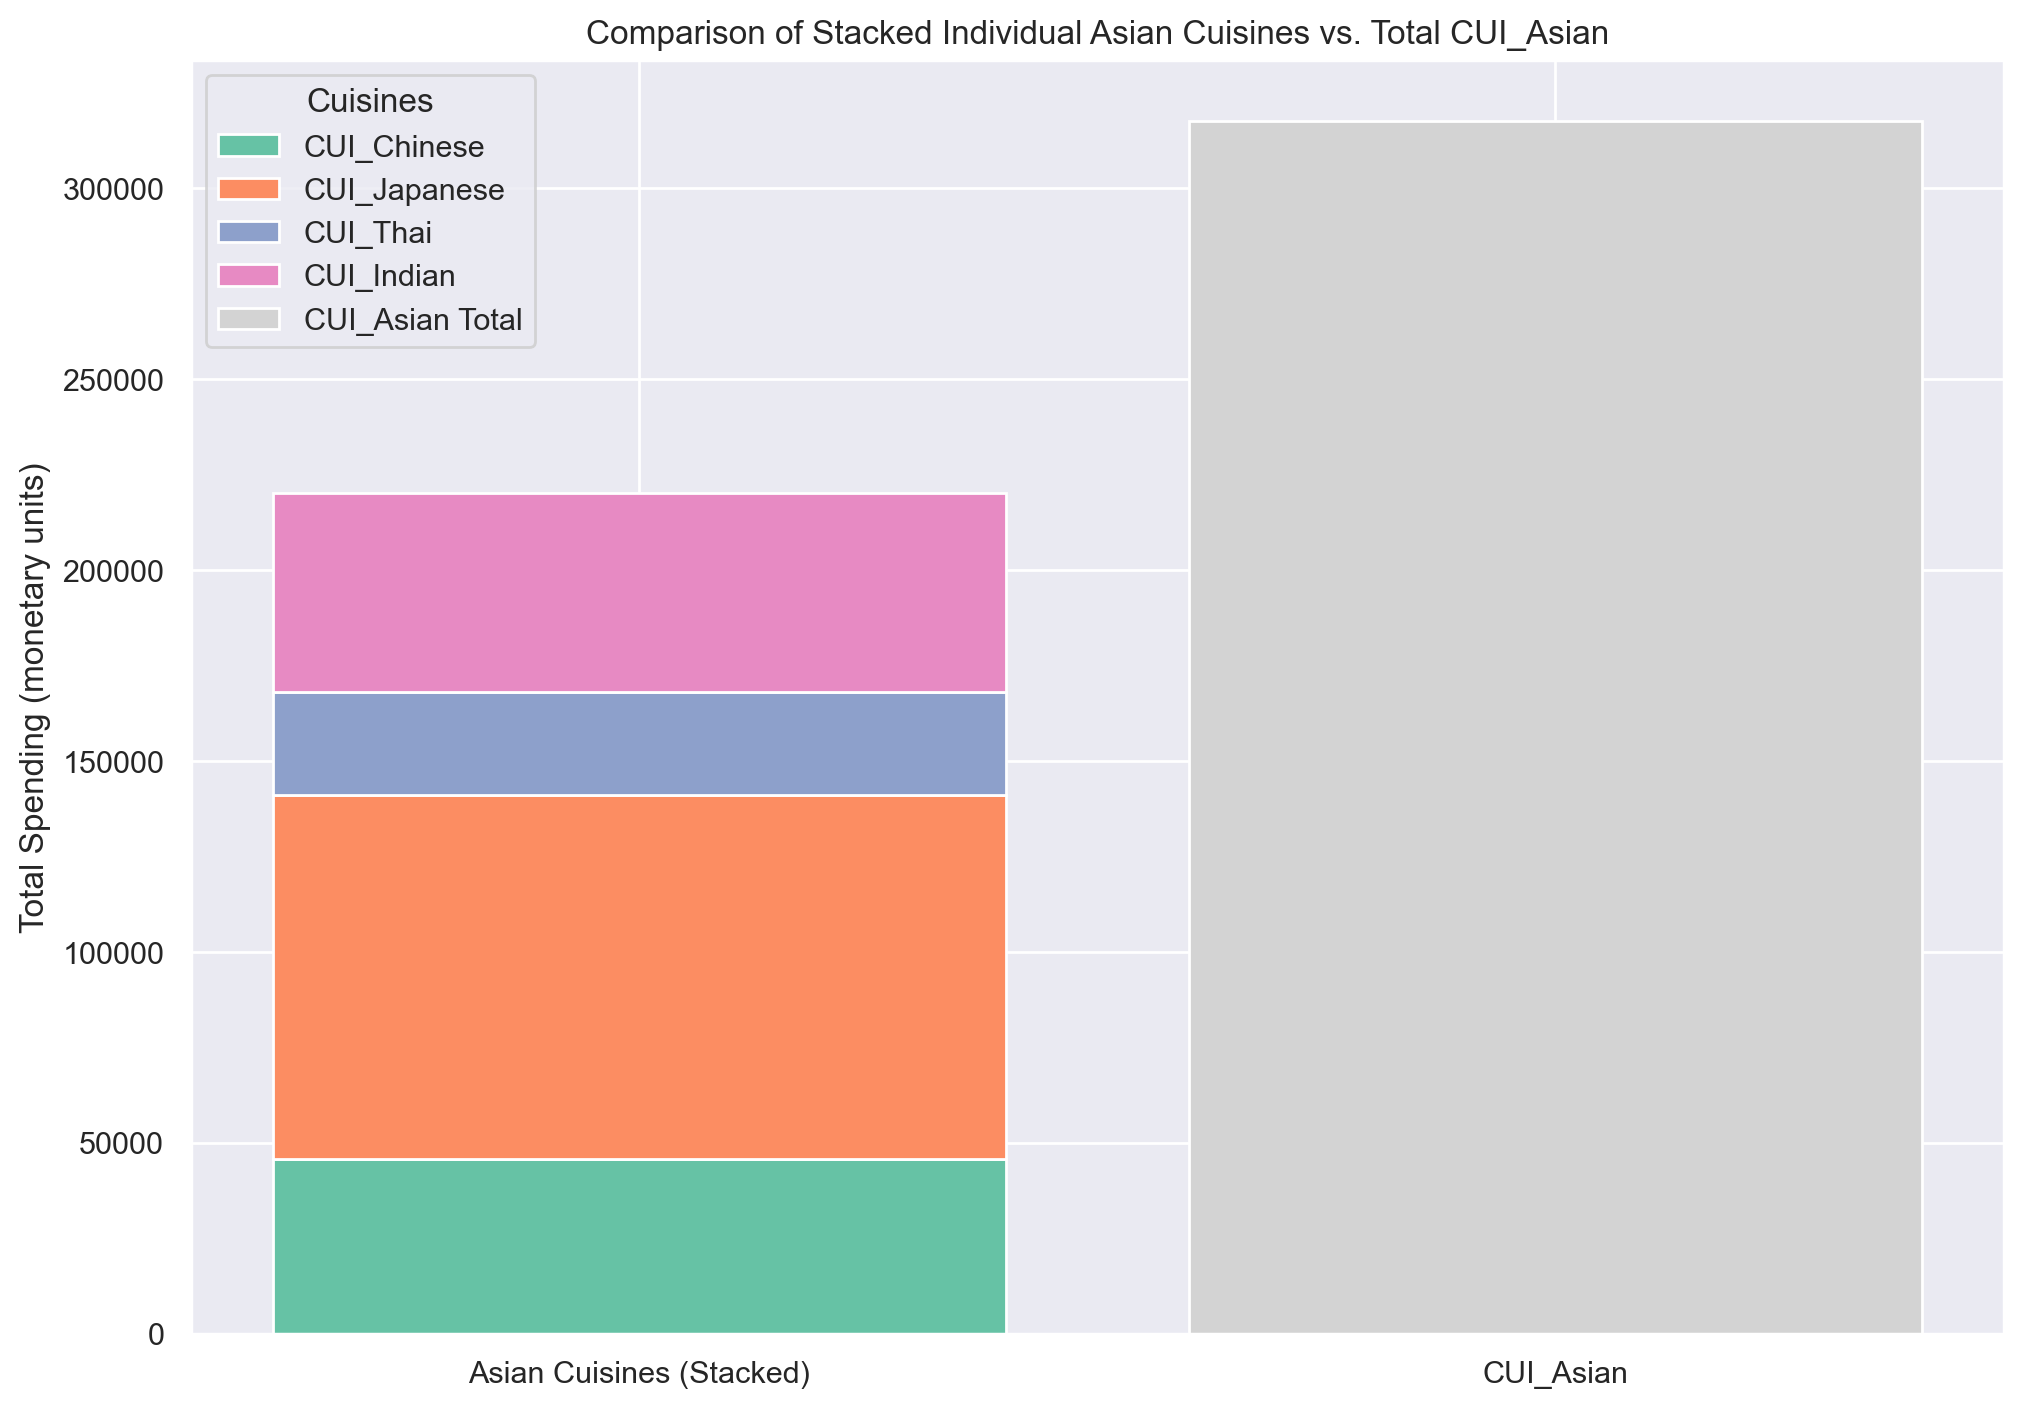

In [79]:
# Columns to sum for stacked Asian cuisine bar
cuisines = ["CUI_Chinese", "CUI_Japanese", "CUI_Thai", "CUI_Indian"]

# Sum of the money spent in the 4 main asian cuisines
cuisine_sums = [df[col].sum() for col in cuisines]

# Total money spent in CUI_Asian
sum_asian = df["CUI_Asian"].sum()

# Subplot for the stacked bar chart
fig, ax = plt.subplots()

# Plotting each cuisine individually in the stack
bottom = 0
colors = sns.color_palette("Set2")
for i, (cuisine, color) in enumerate(zip(cuisines, colors)):
    ax.bar("Asian Cuisines (Stacked)", cuisine_sums[i], bottom=bottom, label=cuisine, color=color)
    bottom += cuisine_sums[i]  # Update bottom for the next stack segment

# Plotting the total CUI_Asian as a single bar
ax.bar("CUI_Asian", sum_asian, color='lightgrey', label="CUI_Asian Total")

# Labelling and formatting the chart
ax.set_ylabel("Total Spending (monetary units)")
ax.set_title("Comparison of Stacked Individual Asian Cuisines vs. Total CUI_Asian")
ax.legend(title="Cuisines", loc="upper left")

plt.show()

In [80]:
print(f'Difference in money spent between generic and popular asian cuisines: {round(df["CUI_Asian"].sum() - df[["CUI_Japanese", "CUI_Indian", "CUI_Chinese", "CUI_Thai"]].sum().sum(), 2)}')

Difference in money spent between generic and popular asian cuisines: 97609.32


If we assume that "CUI_Asian" contains other Asian countries cuisines, we can say that around 2/3 of the money spent in Asian cuisines comes from only Japanese, Indian, Chinese and Thai cuisines. 
We can speculate there is only 97473.32 money units spent in the rest of the Asian cuisines, excluding those 4 main Asian cuisines.

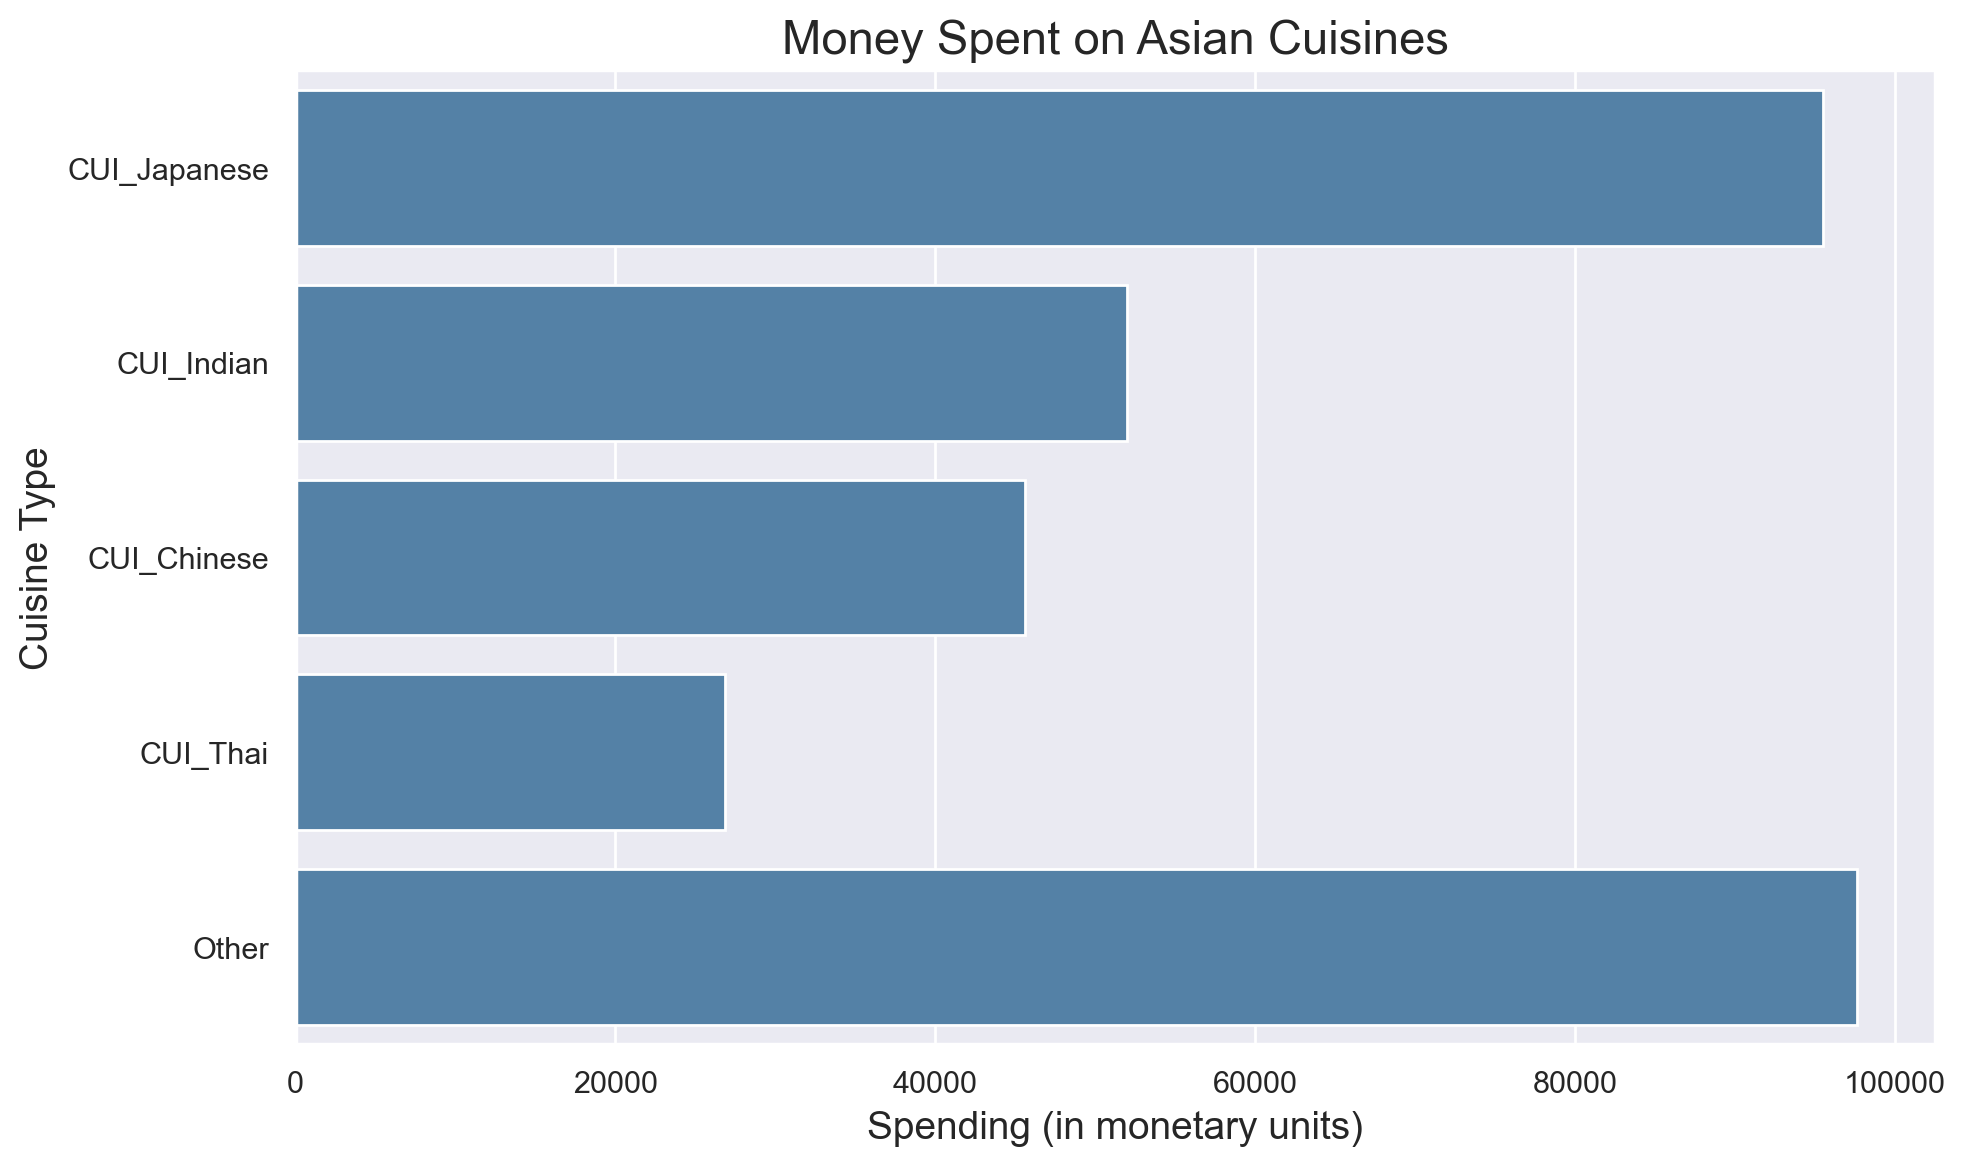

In [81]:
# Difference in money spent between generic and popular asian cuisines
asian_cuisine_sums['Other'] = df['CUI_Asian'].sum() - asian_cuisine_sums.sum()

# Reset the index to turn the data into a format suitable for plotting
asian_cuisine_sums_df = asian_cuisine_sums.reset_index()
asian_cuisine_sums_df.columns = ['Cuisine', 'Spending']

# Plotting the barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=asian_cuisine_sums_df, x='Spending', y='Cuisine', color='steelblue')  

# Adding title and labels
plt.title("Money Spent on Asian Cuisines", size=17)
plt.xlabel("Spending (in monetary units)", size=14)
plt.ylabel("Cuisine Type", size=14)

# Display the barplot
plt.tight_layout()
plt.show()

Japanese cuisine could represent over 30% of the total spending in Asian cuisine.

* **European, Asian, American and Other cuisines VS. Remaining**

In [82]:
# Total spending in all continents
total_spend = df[['CUI_American', 'CUI_Asian', 'CUI_Italian', 'CUI_OTHER']].sum().sum()
total_spend

672014.5

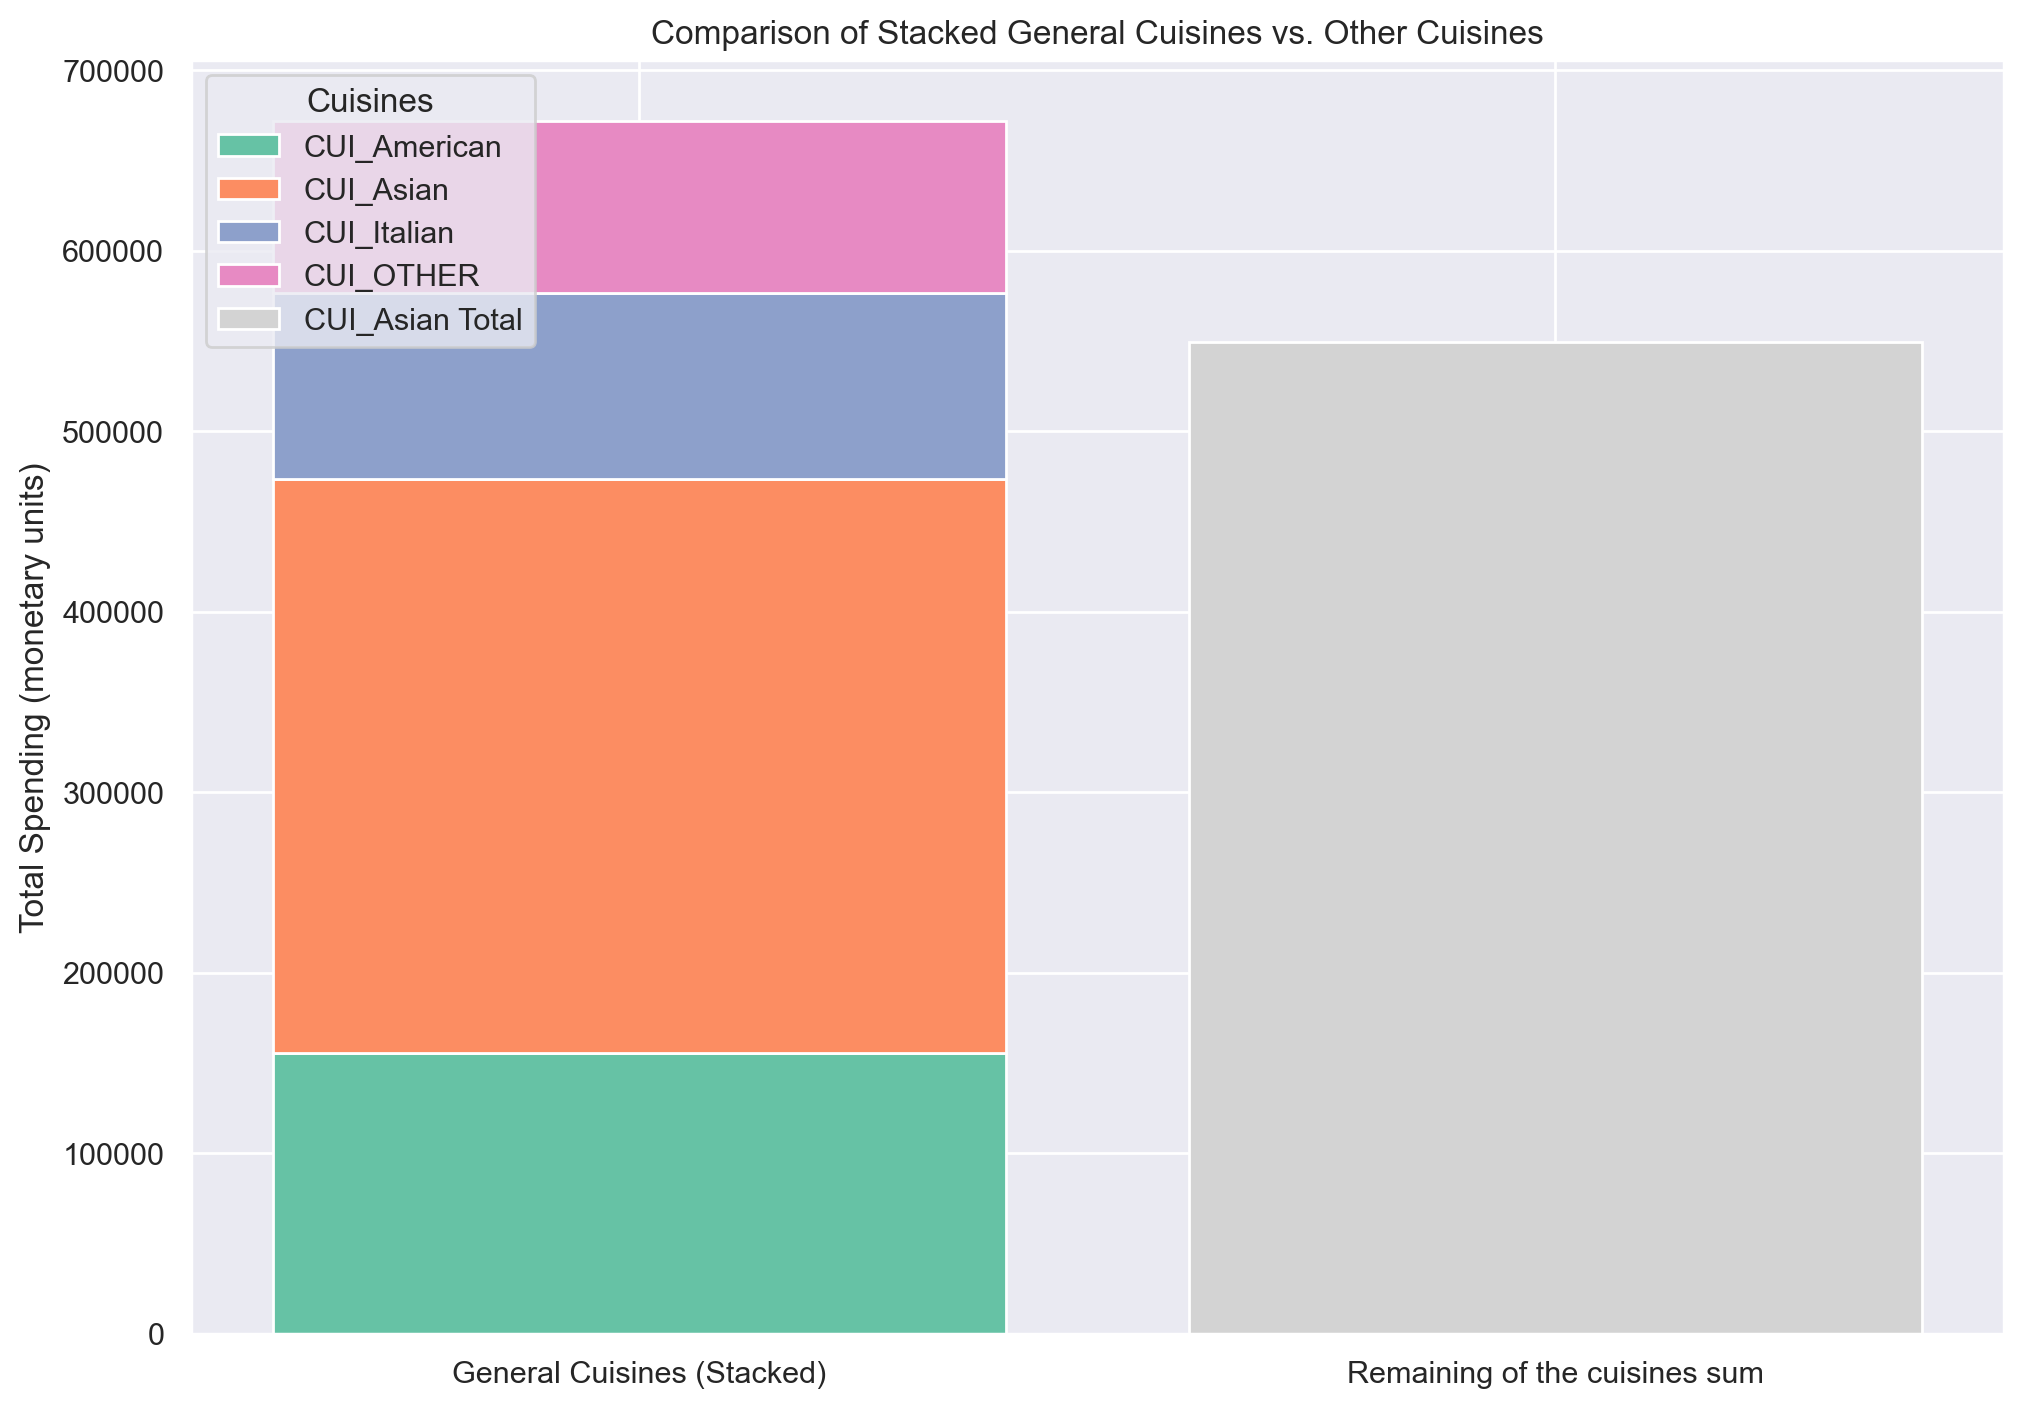

In [83]:
# Columns to sum for stacked Asian cuisine bar
cuisines = ['CUI_American', 'CUI_Asian', 'CUI_Italian', 'CUI_OTHER']

# Money spent in each of the 4 generic cuisines
cuisine_sums = [df[col].sum() for col in cuisines]

# Money spent in the rest of the cuisines
rest_cui_sum = df[cuisine_columns].sum().sum() - sum(cuisine_sums)

# Subplots for the stacked bar chart
fig, ax = plt.subplots()

# Plotting each cuisine individually in the stack
bottom = 0
colors = sns.color_palette("Set2")
for i, (cuisine, color) in enumerate(zip(cuisines, colors)):
    ax.bar("General Cuisines (Stacked)", cuisine_sums[i], bottom=bottom, label=cuisine, color=color)
    bottom += cuisine_sums[i]  # Update bottom for the next stack segment

# Plotting the total CUI_Asian as a single bar
ax.bar("Remaining of the cuisines sum", rest_cui_sum, color='lightgrey', label="CUI_Asian Total")

# Labeling and formatting the chart
ax.set_ylabel("Total Spending (monetary units)")
ax.set_title("Comparison of Stacked General Cuisines vs. Other Cuisines")
ax.legend(title="Cuisines", loc="upper left")

plt.show()

It is reasonable to think that these 4 cuisines contain the other types of cuisines in the dataset, because the total spending in these 4 cuisines is greater than the total spending in the remaining cuisines.

* **European VS. Asian VS. American VS. Other Cuisines**

<Axes: xlabel='None'>

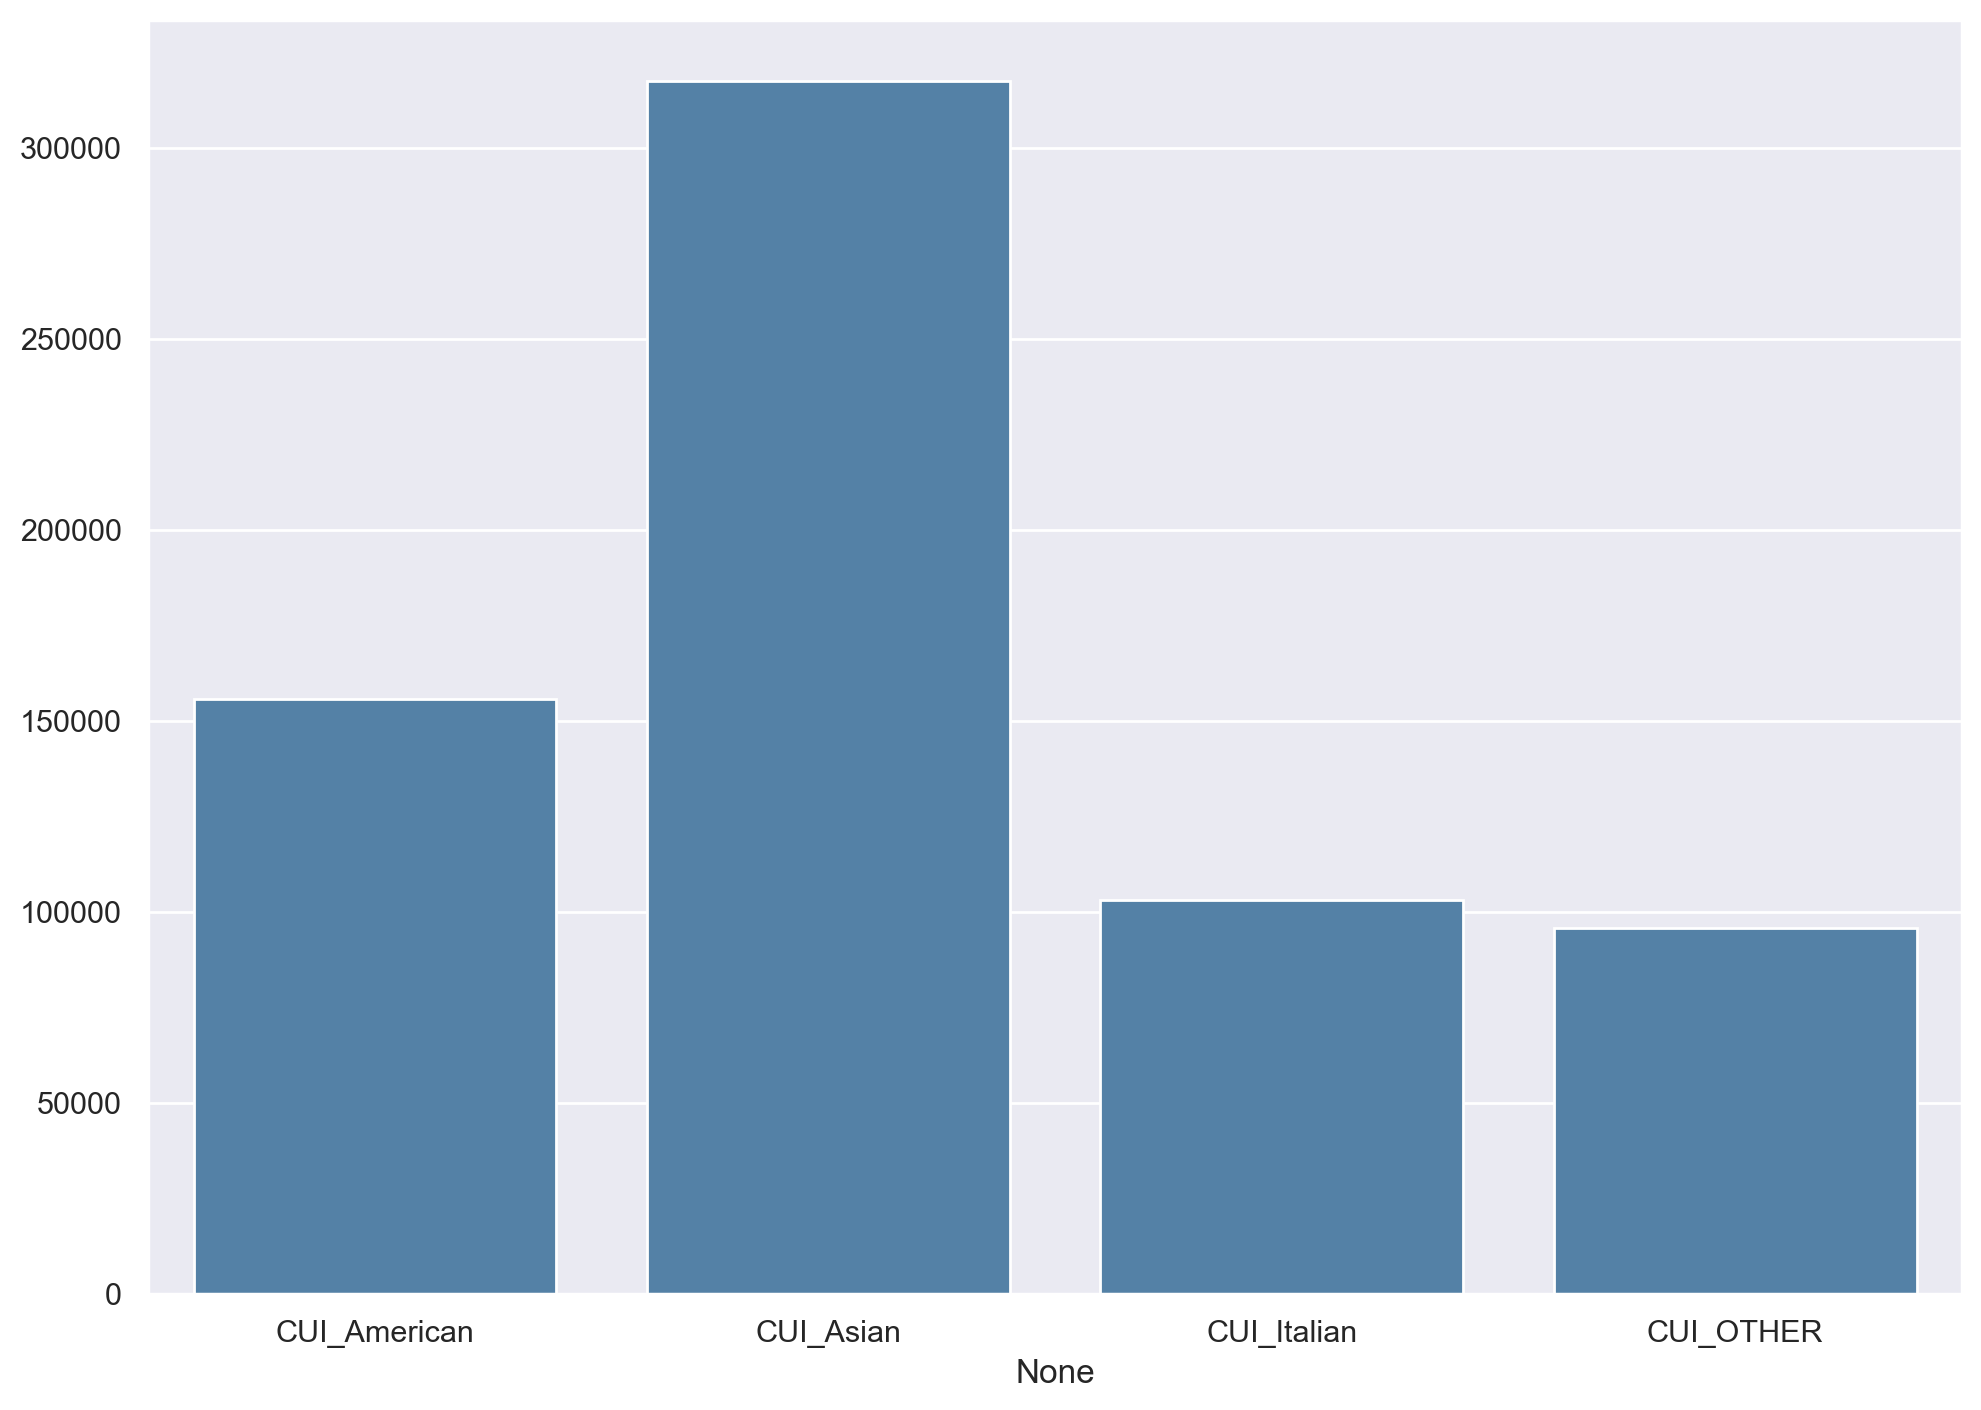

In [84]:
# Barplot with the total spending in the 4 generic cuisines
sns.barplot(x=df[['CUI_American', 'CUI_Asian', 'CUI_Italian', 'CUI_OTHER']].sum().index, y=df[['CUI_American', 'CUI_Asian', 'CUI_Italian', 'CUI_OTHER']].sum().values, color='steelblue')

Asian cuisine is leading in total spending by a huge margin, followed by American and Italian cuisines.

* **Other Interesting Insights**

In [85]:
# Healthy food on total spending
print(f"{round(df['CUI_Healthy'].sum()/total_spend*100, 2)}%")

4.51%


In [86]:
# Unhealthy food on total spending
print(f"{round(df[['CUI_Desserts', 'CUI_Street Food / Snacks']].sum().sum()/total_spend*100, 2)}%")

22.77%


In [87]:
# Cafe orders on total spending
print(f"{round(df['CUI_Cafe'].sum()/total_spend*100, 2)}%")

3.8%


In [88]:
# Japanese cuisine significance in total spending
print(f"{round(df['CUI_Japanese'].sum()/total_spend*100, 2)}%")

14.21%


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'CUI_Street Food / Snacks'),
  Text(1, 0, 'CUI_Beverages'),
  Text(2, 0, 'CUI_Healthy'),
  Text(3, 0, 'CUI_Desserts'),
  Text(4, 0, 'CUI_Cafe'),
  Text(5, 0, 'CUI_Chicken Dishes'),
  Text(6, 0, 'CUI_Noodle Dishes')])

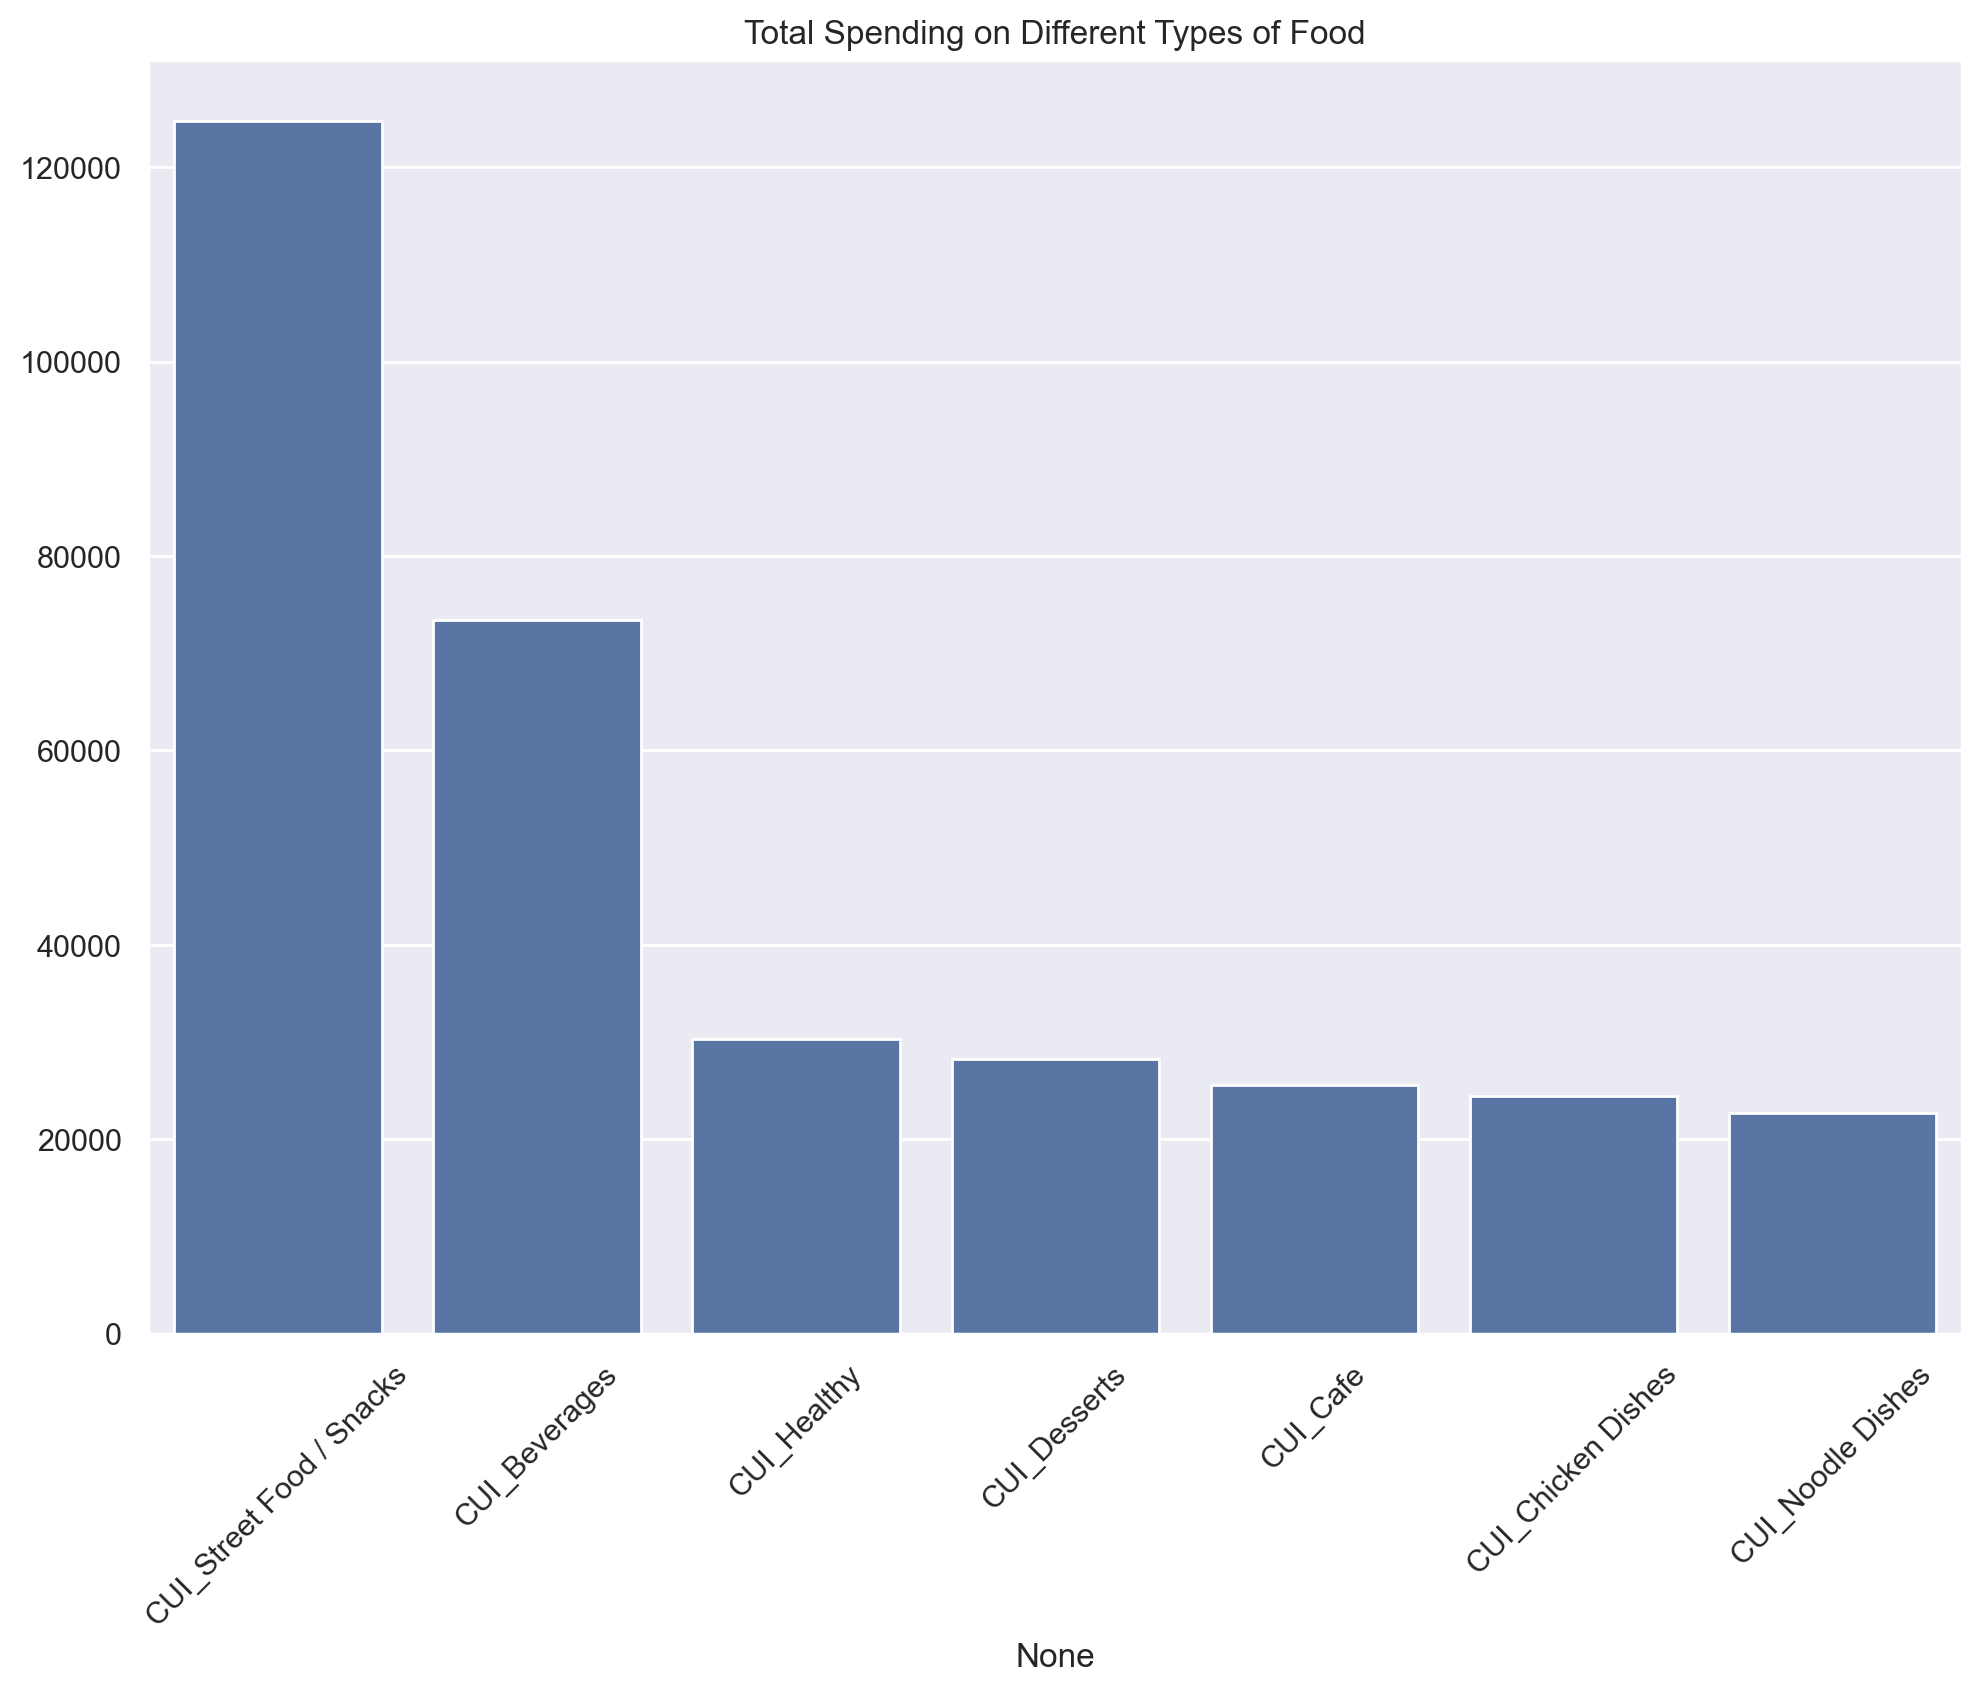

In [89]:
# Cuisines to be analyzed
tf = df[['CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Noodle Dishes', 'CUI_Street Food / Snacks']].sum().sort_values(ascending=False)

# Plotting the bar chart for the selected cuisines
sns.barplot(x=tf.index, y=tf.values)

# Formatting the plot
plt.title('Total Spending on Different Types of Food')
plt.xticks(rotation = 45)

## 3.2 Features' Distributions <a class="anchor" id="3.2"></a>

* Separating metric and non-metric features

In [90]:
non_metric_features = ["customer_region", "last_promo", "payment_method"] #categorical
metric_features = df.columns.drop(non_metric_features).to_list() #numeric

print('Non-metric features: {}, and metric features: {} in the dataset'.format(non_metric_features, metric_features))

Non-metric features: ['customer_region', 'last_promo', 'payment_method'], and metric features: ['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'] in the dataset


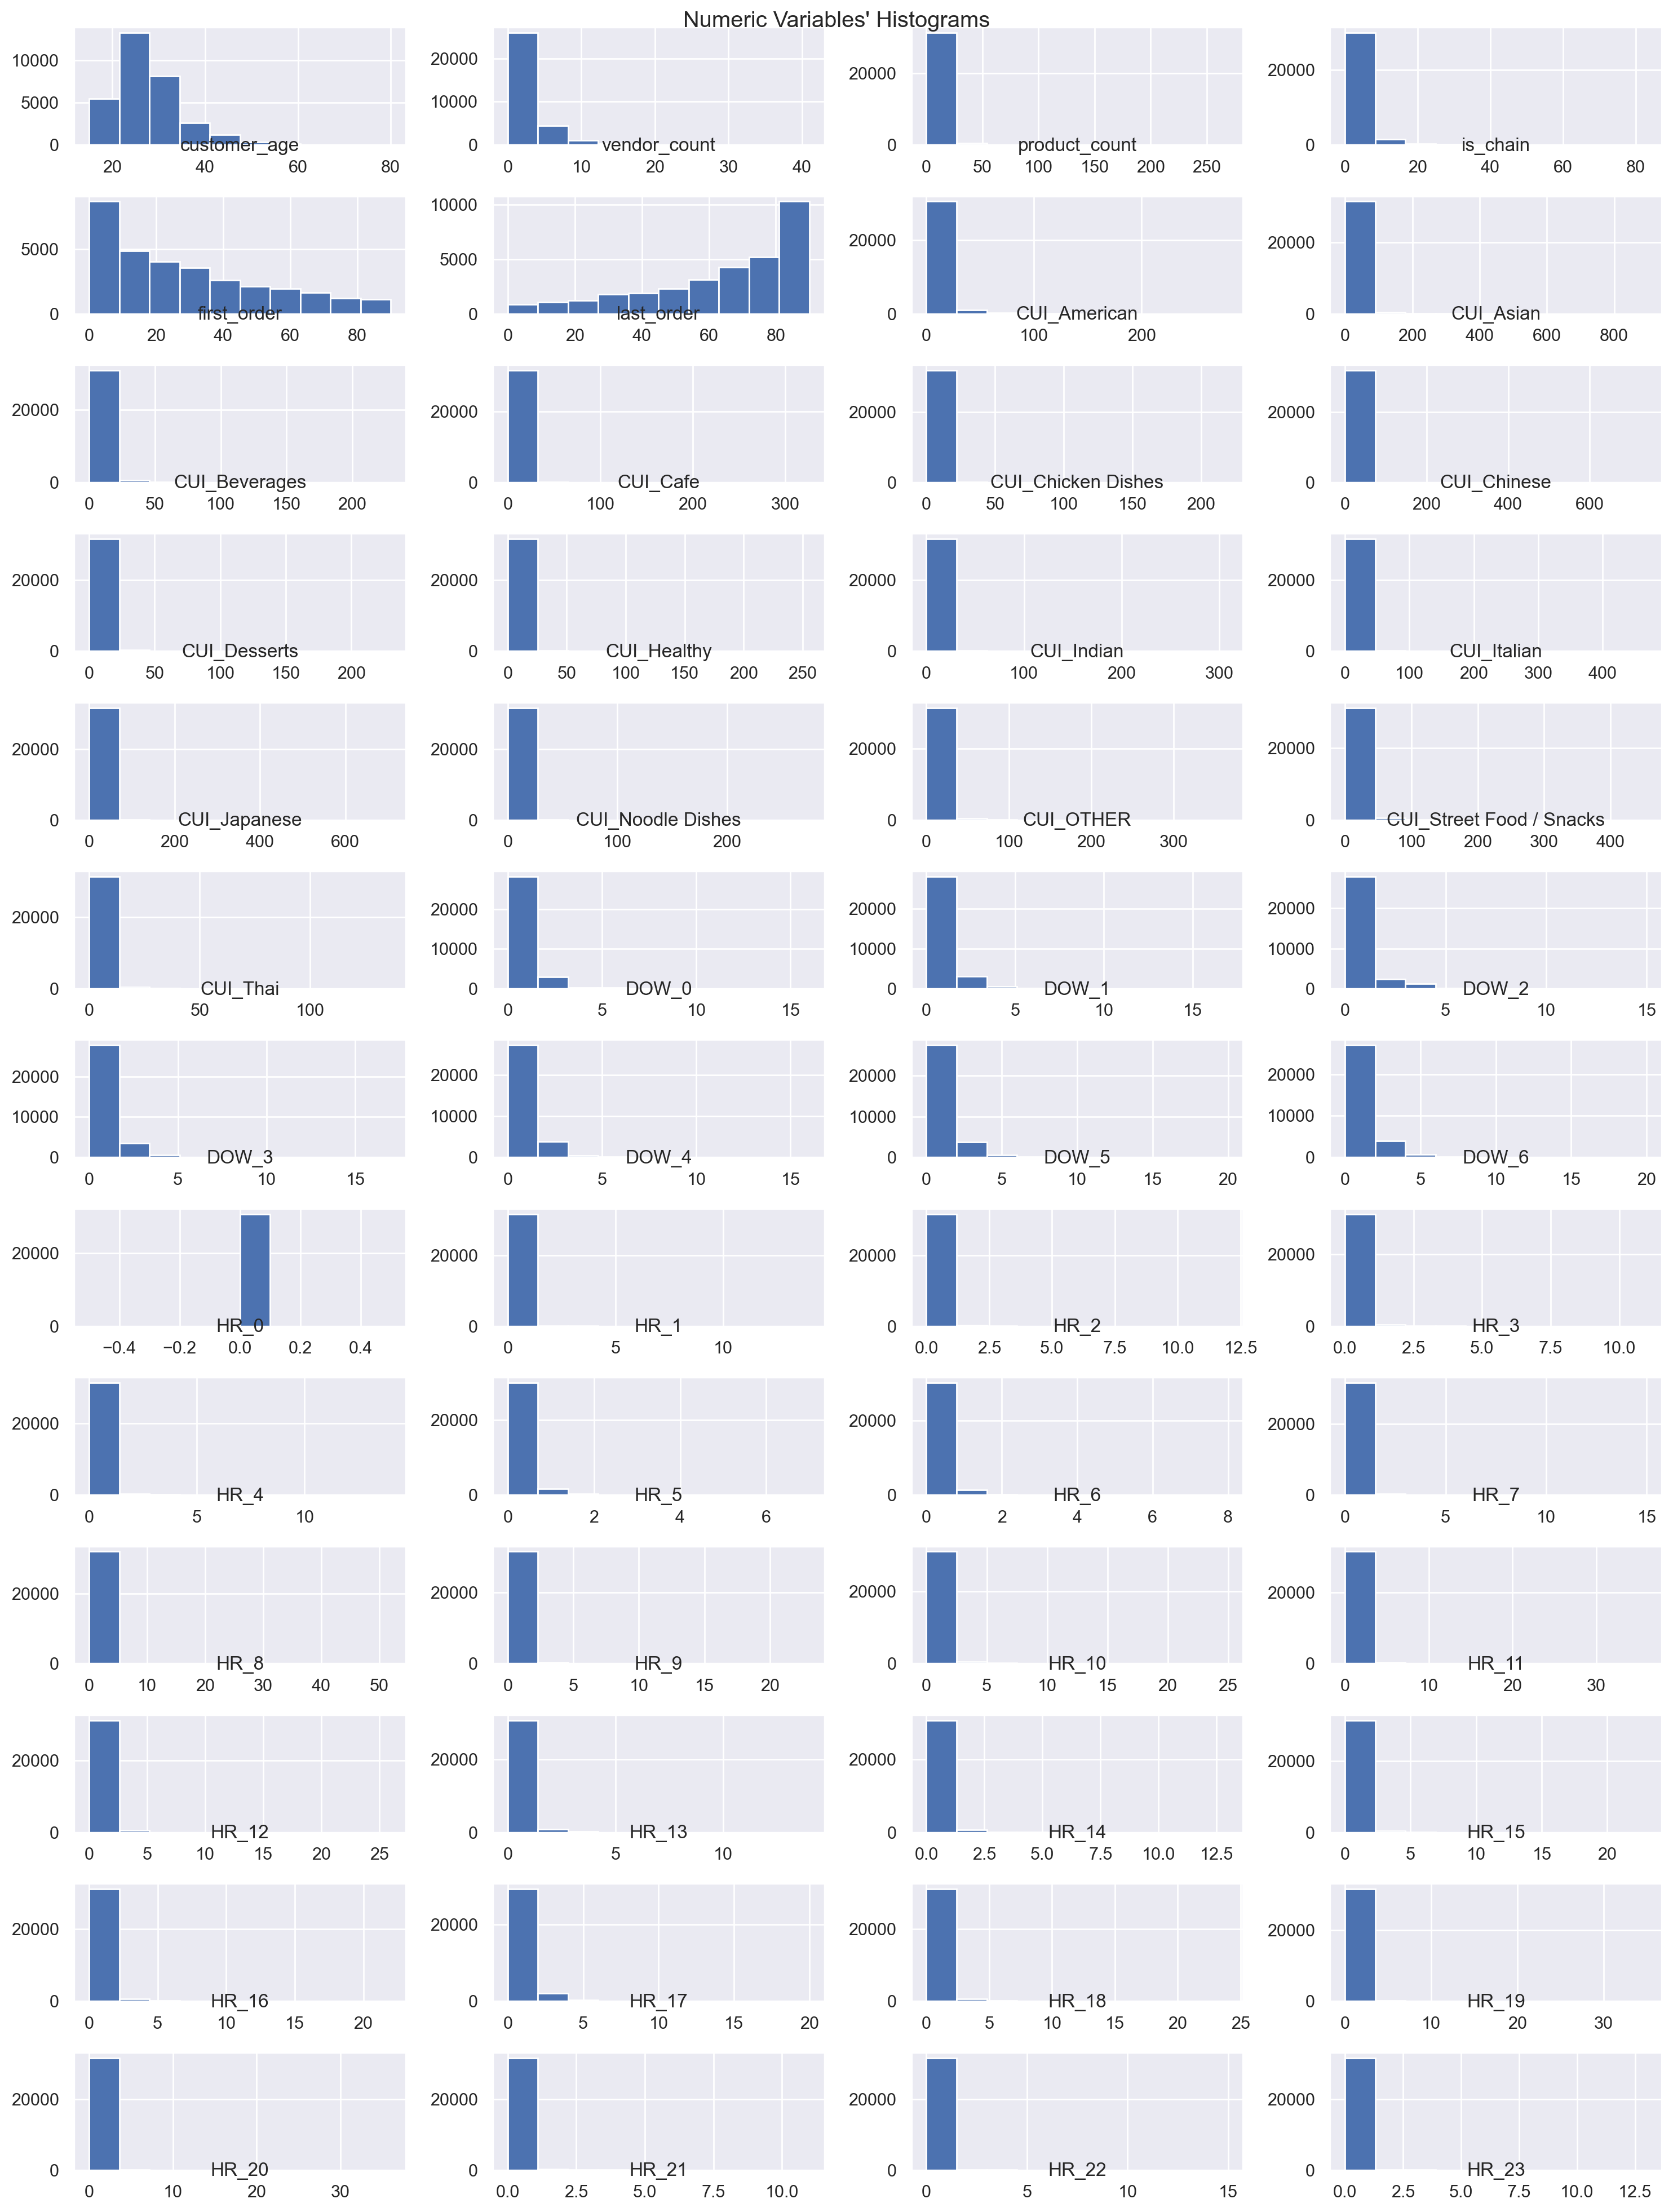

In [91]:
# Creating a grid of subplots
fig, axes = plt.subplots(13, 4, figsize=(15, 20), tight_layout=True)

# Iterating through the axes and the feature names to plot histograms
for ax, feat in zip(axes.flatten(), metric_features):
    # Cleaning the data by replacing infinite values with NaN and dropping NaNs
    cleaned_data = df[feat].replace([np.inf, -np.inf], np.nan).dropna()
    
    # Only plotting the histogram if there is data available
    if len(cleaned_data) > 0:
        ax.hist(cleaned_data)  # Plotting the histogram for the cleaned data
        ax.set_title(feat, y=-0.13)  # Setting the title for the subplot, slightly below the axis
        
    else:
        ax.set_title(f'{feat} (no data)', y=-0.13)  # Indicating no data available
        ax.axis('off')  # Turning off the axis if there's no data

# Adding a centered title for the entire figure
plt.suptitle("Numeric Variables' Histograms")

# Checking if the output directory exists; if not, create it
output_dir = os.path.join('..', 'figures', 'eda')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Displaying the figure
plt.show()

| customer_region   |   count |
|:------------------|--------:|
| 8670              |    9761 |
| 4660              |    9550 |
| 2360              |    8829 |
| 2440              |    1483 |
| 4140              |     857 |
| 8370              |     495 |
| 2490              |     445 |
| -                 |     442 |
| 8550              |      26 |


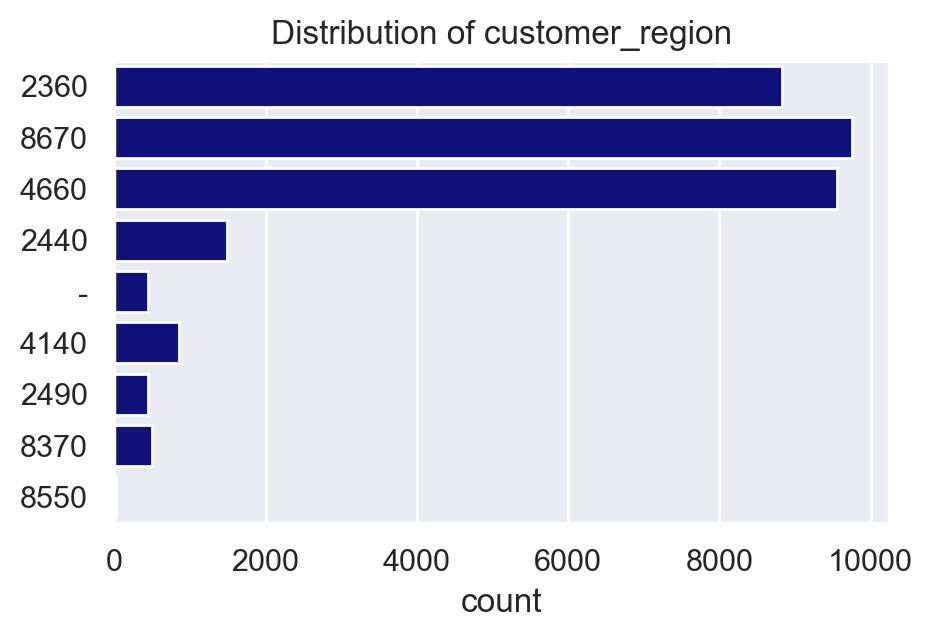

---------------------------------------------------------------------------------------------
| last_promo   |   count |
|:-------------|--------:|
| -            |   16748 |
| DELIVERY     |    6286 |
| DISCOUNT     |    4496 |
| FREEBIE      |    4358 |


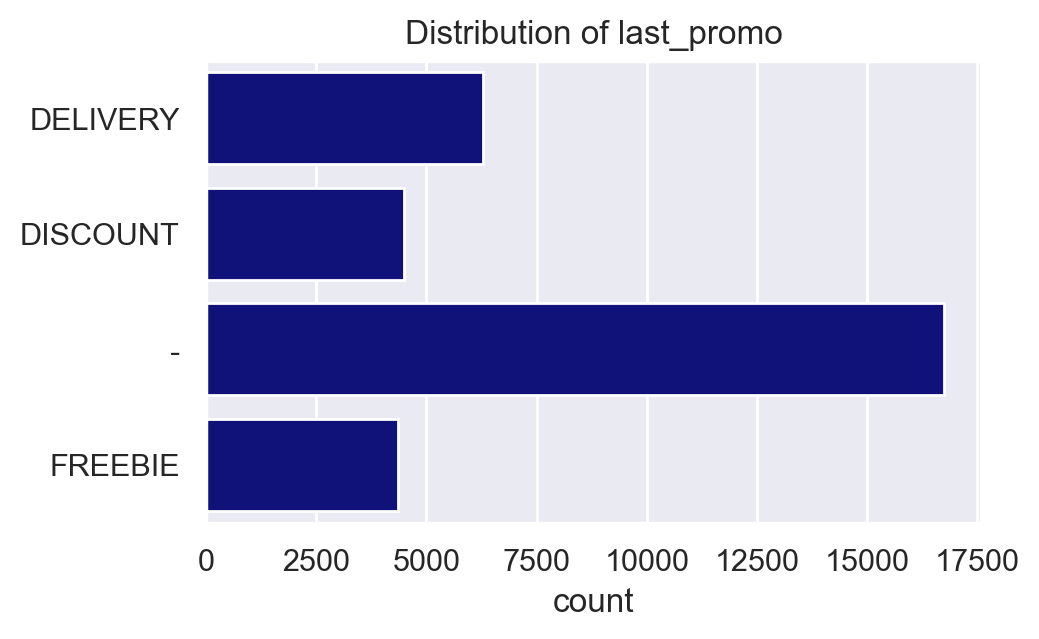

---------------------------------------------------------------------------------------------
| payment_method   |   count |
|:-----------------|--------:|
| CARD             |   20161 |
| DIGI             |    6101 |
| CASH             |    5626 |


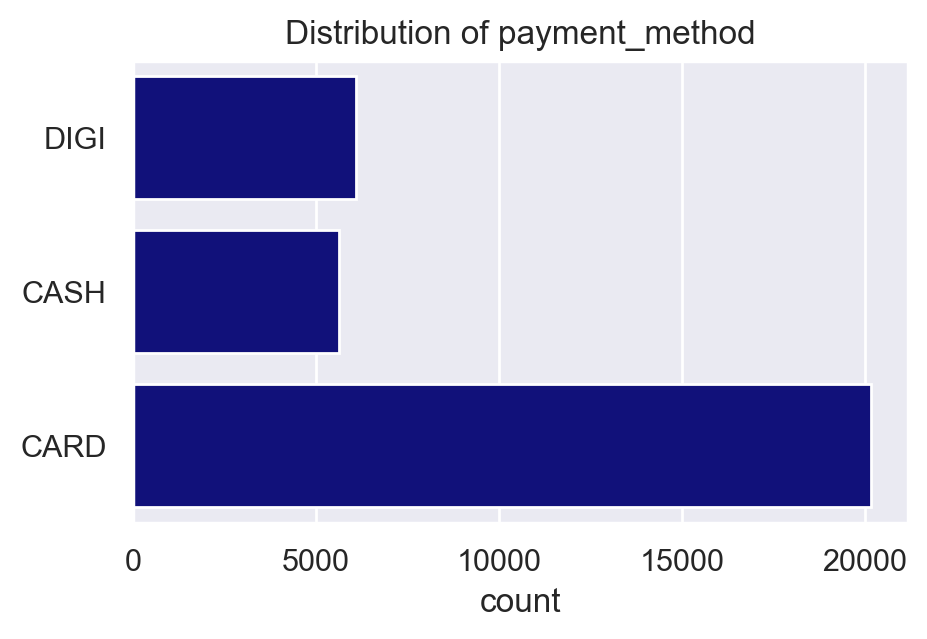

---------------------------------------------------------------------------------------------


In [92]:
# Loop through each non-metric feature
for col in non_metric_features:
    # Print value counts as a Markdown table
    print(df[col].value_counts().to_markdown())
    
    # Create a countplot
    plt.figure(figsize=(5, 3))
    plt.title(f'Distribution of {col}')
    sns.countplot(y=col, data=df, color="darkblue")
    plt.ylabel('')  # Optional: Remove ylabel for a cleaner look
    plt.show()
    
    print('-' * 93)  # Separator for better output readability

**Customer Region:**
* An unspecified region (-) accounts for 442 entries, which could represent missing or unclassified data.

**Last Promo:**
* A significant portion (16,748 entries) has no recorded promotional activity (-), making up over 50% of the dataset.


## 3.3. Coherence Check <a class="anchor" id="3.3"></a>

* Checking if DOW total orders are always bigger or equal to HR total orders:

In [93]:
dow_columns = [f'DOW_{i}' for i in range(7)]
hr_columns = [f'HR_{i}' for i in range(24)]

# Checking if DOW total orders are always bigger or equal than HR total orders
len(df[df[dow_columns].sum(axis=1).astype(int) >= df[hr_columns].sum(axis=1).astype(int)]) == df.shape[0]

True

* Checking for customers with 0 orders:

In [94]:
# Seeing if there are customers with 0 orders
df["product_count"].value_counts().sort_index(ascending=True)[0]

156

There are 156 customers in our dataset whom haven't ordered anything yet. Customers with 0 products ordered are strange cases because they are registered in the database but haven't ordered any products yet.

* Customers with 0 vendors:

In [95]:
# Seeing if there are customers with 0 vendors
df["vendor_count"].value_counts().sort_index(ascending=True)[0]

138

There are 138 cases where customers have ordered from 0 vendors. This is also strange.

* Customers that haven't spent money in any cuisine:

In [96]:
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]

# Seeing if there are customers who haven't spent any money in any cuisine
len(df[df[cuisine_columns].sum(axis=1) == 0])

138

This value (138) matches the previous number of cases where customers have ordered from 0 vendors. Let's check if the rows are the same.

In [97]:
df[df["vendor_count"] == 0].equals(df[df[cuisine_columns].sum(axis=1) == 0])

True

They are indeed the same customers.

* Checking for customers who have a product count lower than their order count:

In [98]:
# Seeing if there are customers with a product count lower than their order count
len(df[df['product_count'] < df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)])

18

A total of 18 customers meet this description, which is also strange because "n" orders should have associated at least "n" products.

We will now explore the age and region of these customers. 
We will consider anomalies: 
 * All duplicate observations 
 * People who are registered but haven't ordered yet 
 * Inconsistent values, such as people whose product count is lower than the order counts.

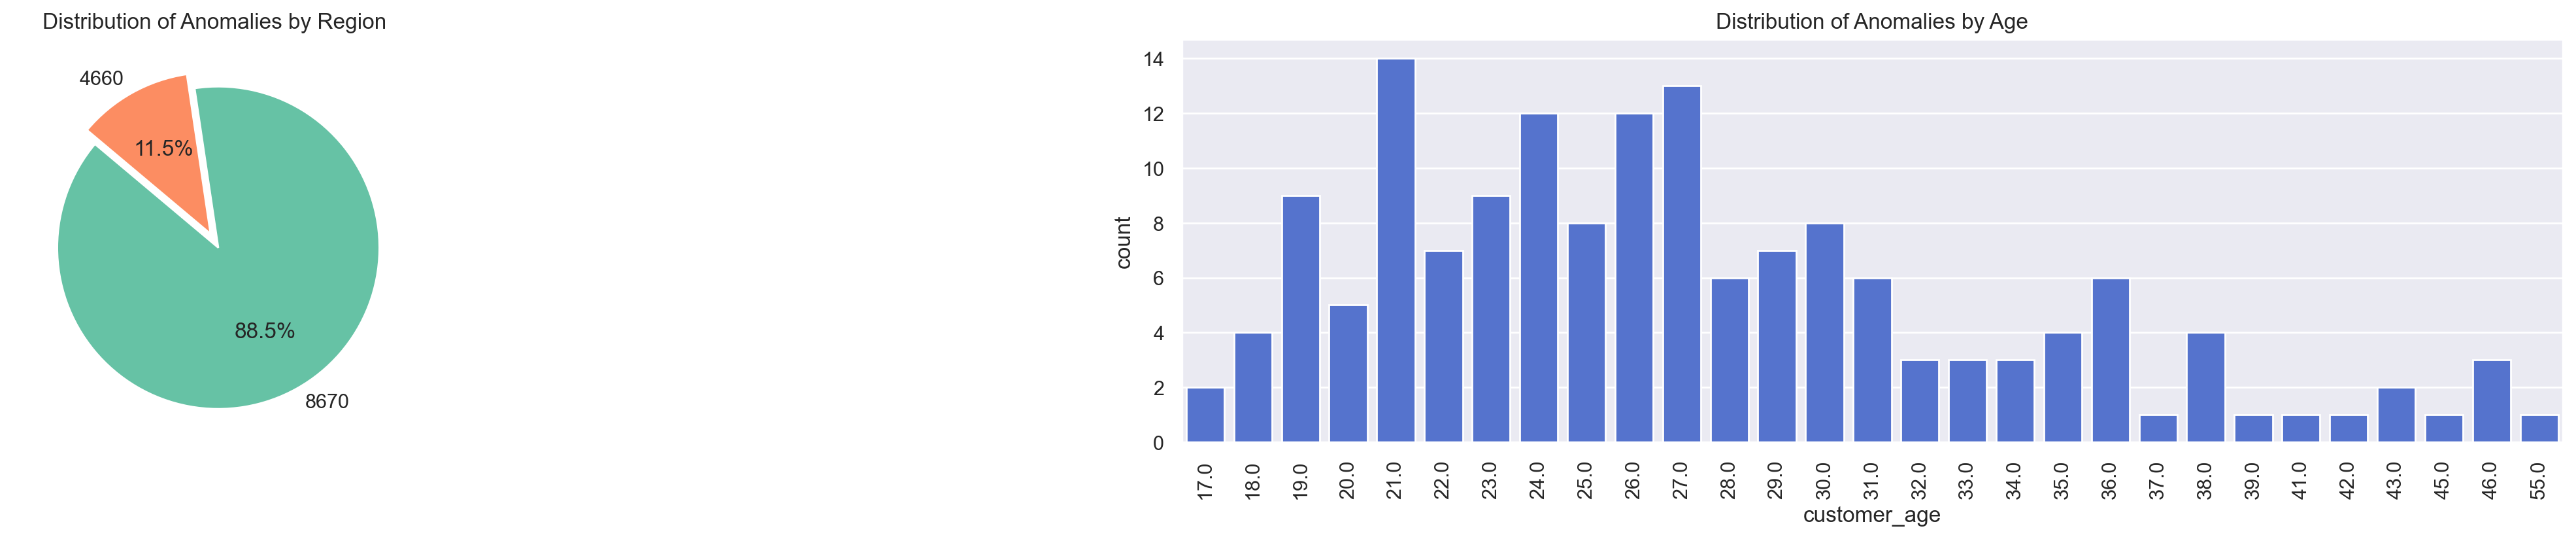

In [99]:
# DF with the anomalies found
anomalies = df[(df["product_count"] == 0) | (df["vendor_count"] == 0) | (df['product_count'] < df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1))]

# Region counts of the anomalies
region_counts = anomalies['customer_region'].value_counts()

total_anomalies = region_counts.sum()

# Identify regions with less than 10% occurrence
low_occurrence_regions = region_counts[region_counts < 0.10 * total_anomalies]

# Group low occurrence regions into "Other"
region_counts_grouped = region_counts.copy()
region_counts_grouped['Other'] = low_occurrence_regions.sum()
region_counts_grouped = region_counts_grouped[region_counts_grouped >= 0.10 * total_anomalies]

# Defining the color palette
palette_color = sns.color_palette('Set2')

# Creating the subplots
fig, axs = plt.subplots(1, 2, figsize=(30, 4))

# Plotting the distribution of anomalies by region
axs[0].pie(region_counts_grouped, labels=region_counts_grouped.index, autopct='%1.1f%%', startangle=140,
           colors=palette_color, explode=[0.05 if label in ['8670', 'Other', '4660'] else 0 for label in region_counts_grouped.index])
axs[0].set_title('Distribution of Anomalies by Region')

# Plotting the distribution of anomalies by age
sns.countplot(data=anomalies, x='customer_age', ax=axs[1], color="royalblue")
plt.xticks(rotation=90)
axs[1].set_title('Distribution of Anomalies by Age')

plt.show()

## 3.4. Outliers Check <a class="anchor" id="3.4"></a>

Figure saved to ..\figures\eda\numeric_features_boxplots.png


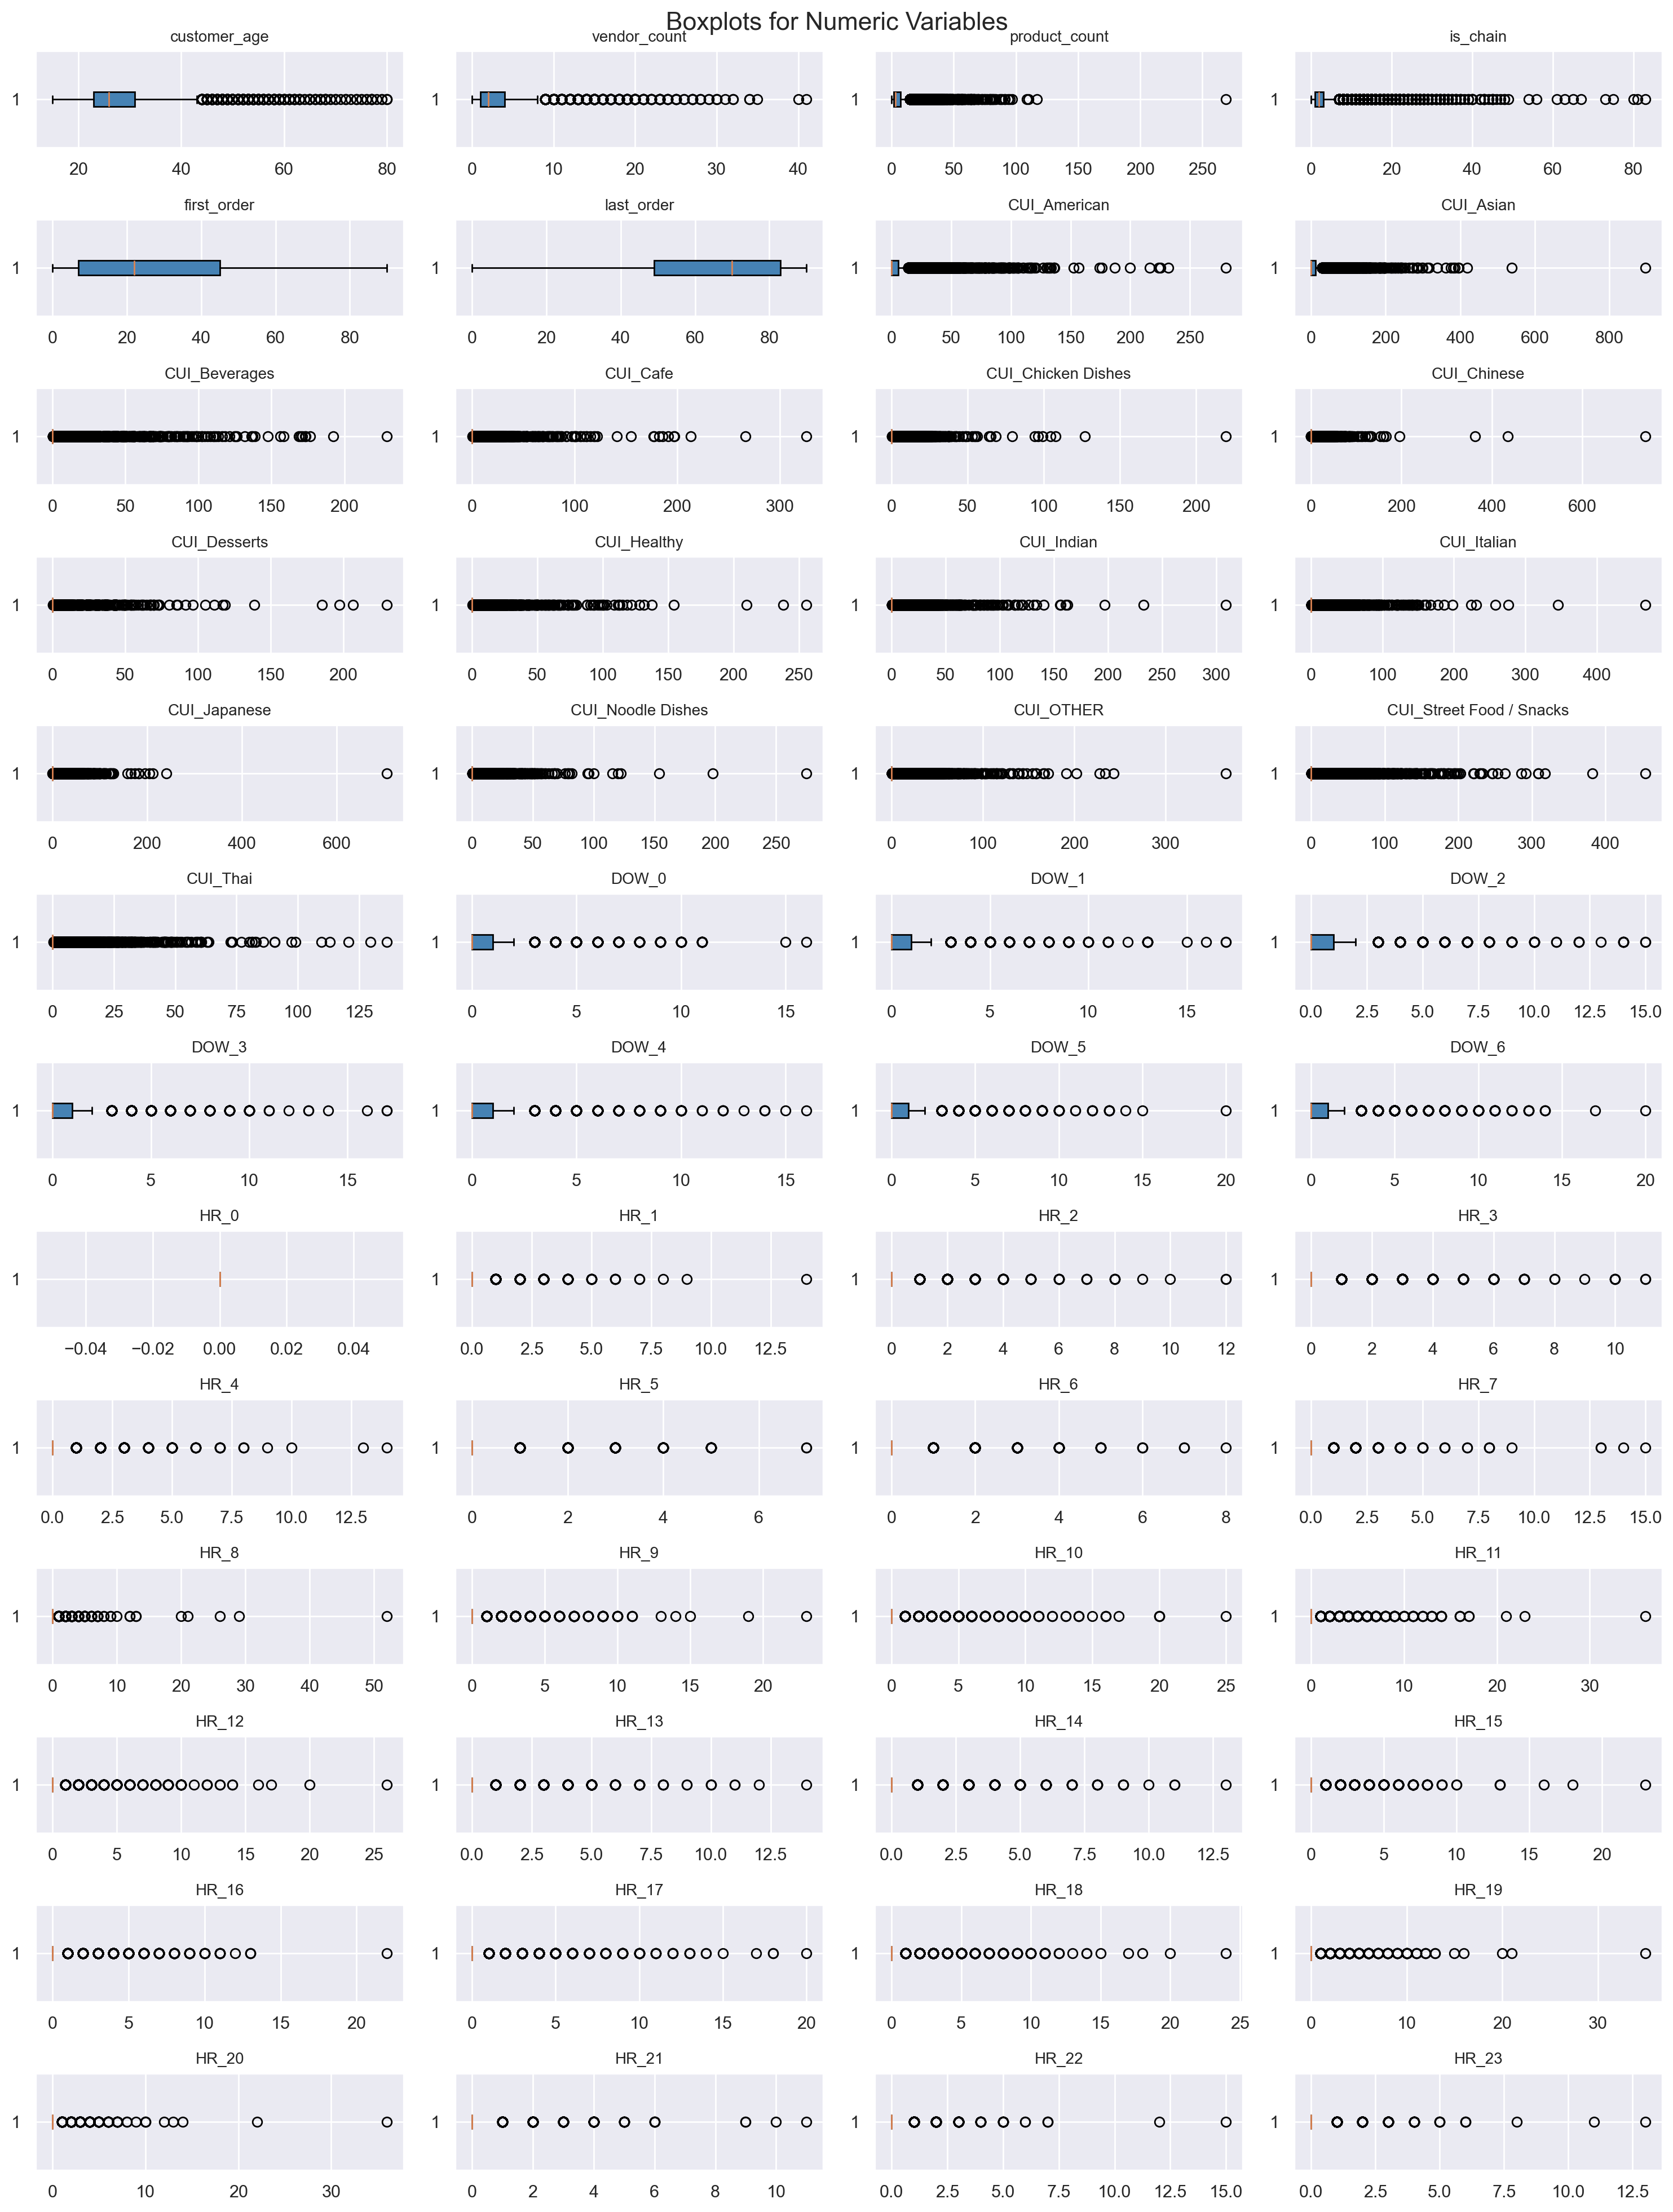

In [100]:
# Creating a grid of subplots for boxplots
fig, axes = plt.subplots(13, 4, figsize=(15, 20), tight_layout=True)

# Flattening axes for easier iteration
axes = axes.flatten()

# Iterating through the axes and the feature names to plot boxplots
for ax, feat in zip(axes, metric_features):
    # Cleaning the data by replacing infinite values with NaN and dropping NaNs
    cleaned_data = df[feat].replace([np.inf, -np.inf], np.nan).dropna()
    
    # Only plotting the boxplot if there is data available
    if not cleaned_data.empty:
        ax.boxplot(cleaned_data, vert=False, patch_artist=True, boxprops=dict(facecolor="steelblue"))
        ax.set_title(feat, fontsize=10, loc='center')  # Setting the title for the subplot
        ax.set_xlabel("")  # No xlabel to save space
    else:
        ax.set_title(f'{feat} (no data)', fontsize=10)  # Indicating no data available
        ax.axis('off')  # Turning off the axis if there's no data

# Hide any unused subplots
for ax in axes[len(metric_features):]:
    ax.axis('off')

# Adding a centered title for the entire figure
plt.suptitle("Boxplots for Numeric Variables", fontsize=16)

# Saving the figure
output_dir = os.path.join('..', 'figures', 'eda')
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist
output_path = os.path.join(output_dir, 'numeric_features_boxplots.png')
plt.savefig(output_path, dpi=300)
print(f"Figure saved to {output_path}")

# Displaying the figure
plt.show()

We can observe the presence of outliers in most boxplots. On the next section, we will provide a more detailed treatment for these values.

<a class="anchor" id="forth-bullet">     

# 4. Data Preprocessing

##  4.1. Handling Troublesome Values <a class="anchor" id="4.1"></a>

###  4.1.1 Dropping Anomalies <a class="anchor" id="4.1.2"></a>

In [101]:
# Checking for duplicates
df.duplicated().sum()

60

In [102]:
print(df[df.duplicated()])

            customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
4336560739             2360          24.0             1              2   
dcc76a0a1b             4660          32.0             3              4   
b55012ee1c             8550          23.0             4             11   
a59a79af83             4660          25.0             4              5   
49a726df01             2360          29.0            11             39   
ef521b81c9             2360          35.0             4             14   
726f00c63b             2360          32.0             9             16   
f841c19db0             8670          19.0             6             11   
7a6db42ede             4660          31.0             4              6   
24251eb7da             8550          28.0             4              8   
d061dc5798             8670          38.0             9             31   
217d06f517             4660          2

* Remark: Duplicates appear in pairs (they have the same information as some other observation in the dataset, only different id's). We decided to drop one of them, since they're adding redundant information to the dataset, giving more weight to specific behaviours.

In [103]:
# Storing duplicate rows
df_duplicated = df[df.duplicated()]

# Dropping duplicates
df.drop_duplicates(inplace=True)

# [TBD:] Look into this section, and the 3.2 Coherence Check

We previously considered anomalies all duplicate observations, people who are registered but haven't ordered yet, and inconsistent values such as people whose product count is lower than the order counts.

In [104]:
# Assuming 'anomalies' contains rows removed from the original df
original_size = df.shape[0]  # Total rows before removing anomalies
cleaned_size = df.shape[0] - anomalies.shape[0]  # Rows left after removing anomalies

# Calculate the percentage of data retained
percentage_kept = 100 * (cleaned_size / original_size)

print('Percentage of data kept after removing anomalies:', np.round(percentage_kept, 4))

Percentage of data kept after removing anomalies: 99.5099


We lose less than 1% of our data, thereby concluding it is not troublesome to drop these rows.

#NOTE: Anomalies have not been drop yet, only duplicate values, but the percentage is calculated here. Should we drop them next?

###  4.1.2 Handling Missing Values <a class="anchor" id="4.1.2"></a>

In [105]:
# Check for missing values
missing_summary = df.isnull().sum()
print(f"Missing values per column:\n{missing_summary}")

Missing values per column:
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5           

* Check for strange values:

In [106]:
df["customer_region"].value_counts()

customer_region
8670    9748
4660    9533
2360    8815
2440    1482
4140     856
8370     495
2490     444
-        442
8550      13
Name: count, dtype: int64

**Missing values in the following columns:**
- customer_age - 727
- first_order - 106 
- HR_0 - 1165
- customer region - 442

### customer_age:

In [107]:
df[["customer_age"]].dtypes

customer_age    float64
dtype: object

In [108]:
#df_customer_age = df["customer_age"].fillna(0).replace([float('inf'), -float('inf')], 0).astype(int)
df_customer_age = df["customer_age"].dropna().astype(int)

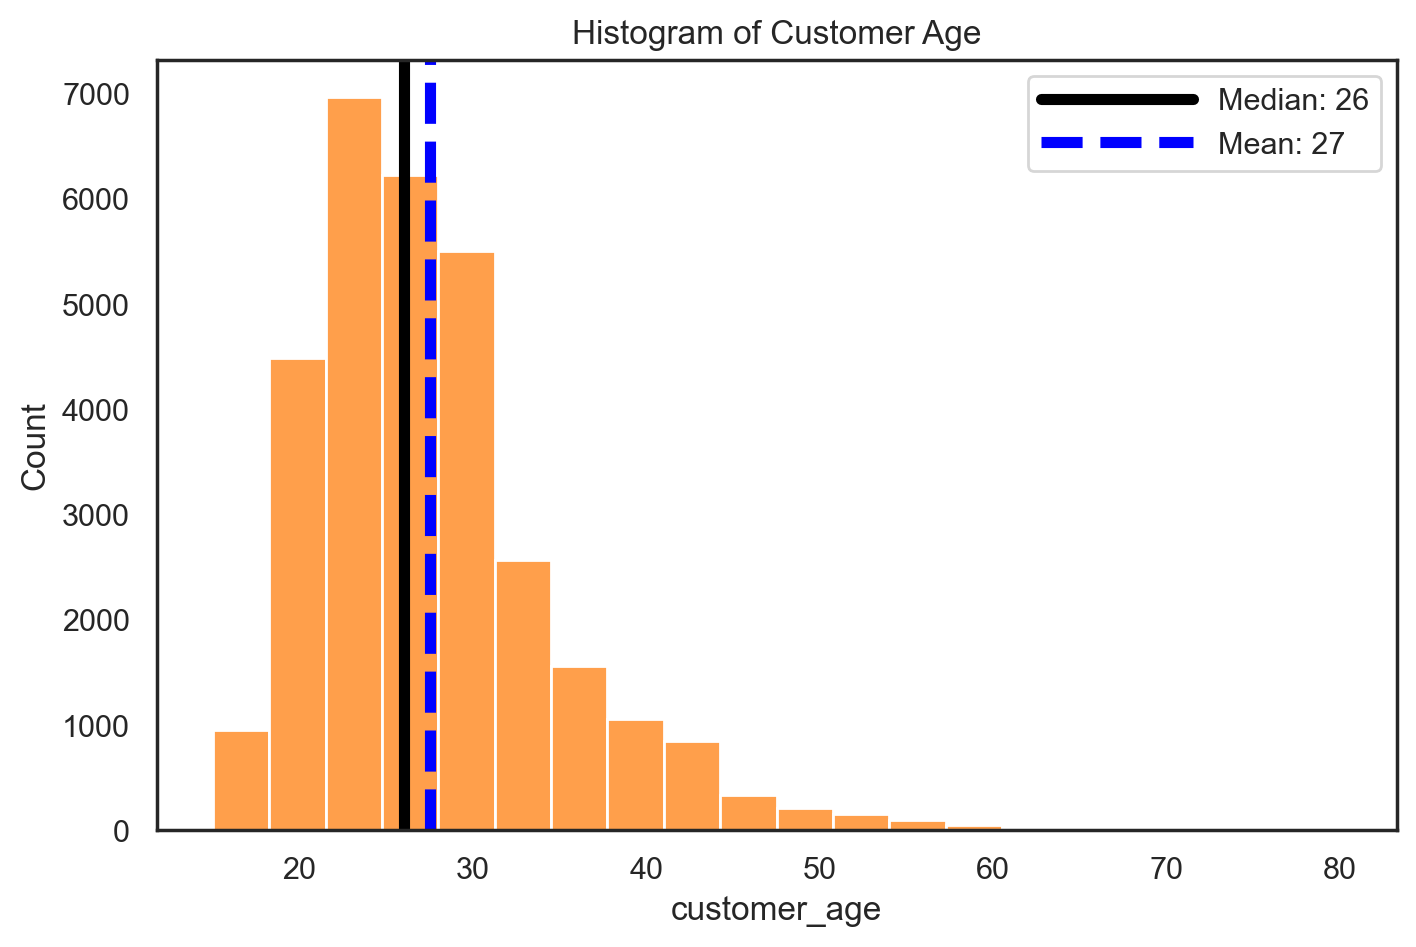

In [109]:
# Calculate statistics
median_age = np.median(df_customer_age)
mean_age = np.mean(df_customer_age)

# Set up the plot
sns.set_theme(style="white", palette=None)
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the histogram
sns.histplot(df['customer_age'], bins=20, ax=ax, color='tab:orange')

# Add vertical lines for median and mean
ax.axvline(median_age, color='black', linewidth=4,
           label=f'Median: {int(median_age)}')
ax.axvline(mean_age, color='blue', linestyle='dashed', linewidth=4,
           label=f'Mean: {int(mean_age)}')

# Add legend and title
ax.legend(handlelength=5)
ax.set_title("Histogram of Customer Age")

# Show the plot
plt.show()

# Reset seaborn to default
sns.set()

For this feature, there is no significant difference between median or mean. 

In [110]:
df['customer_age'] = df['customer_age'].fillna(df['customer_age'].median())

### **first_order:**

In [111]:
df[["first_order"]].dtypes

first_order    float64
dtype: object

In [112]:
# dropping NaN
df_first_order = df["first_order"].dropna().astype(int)

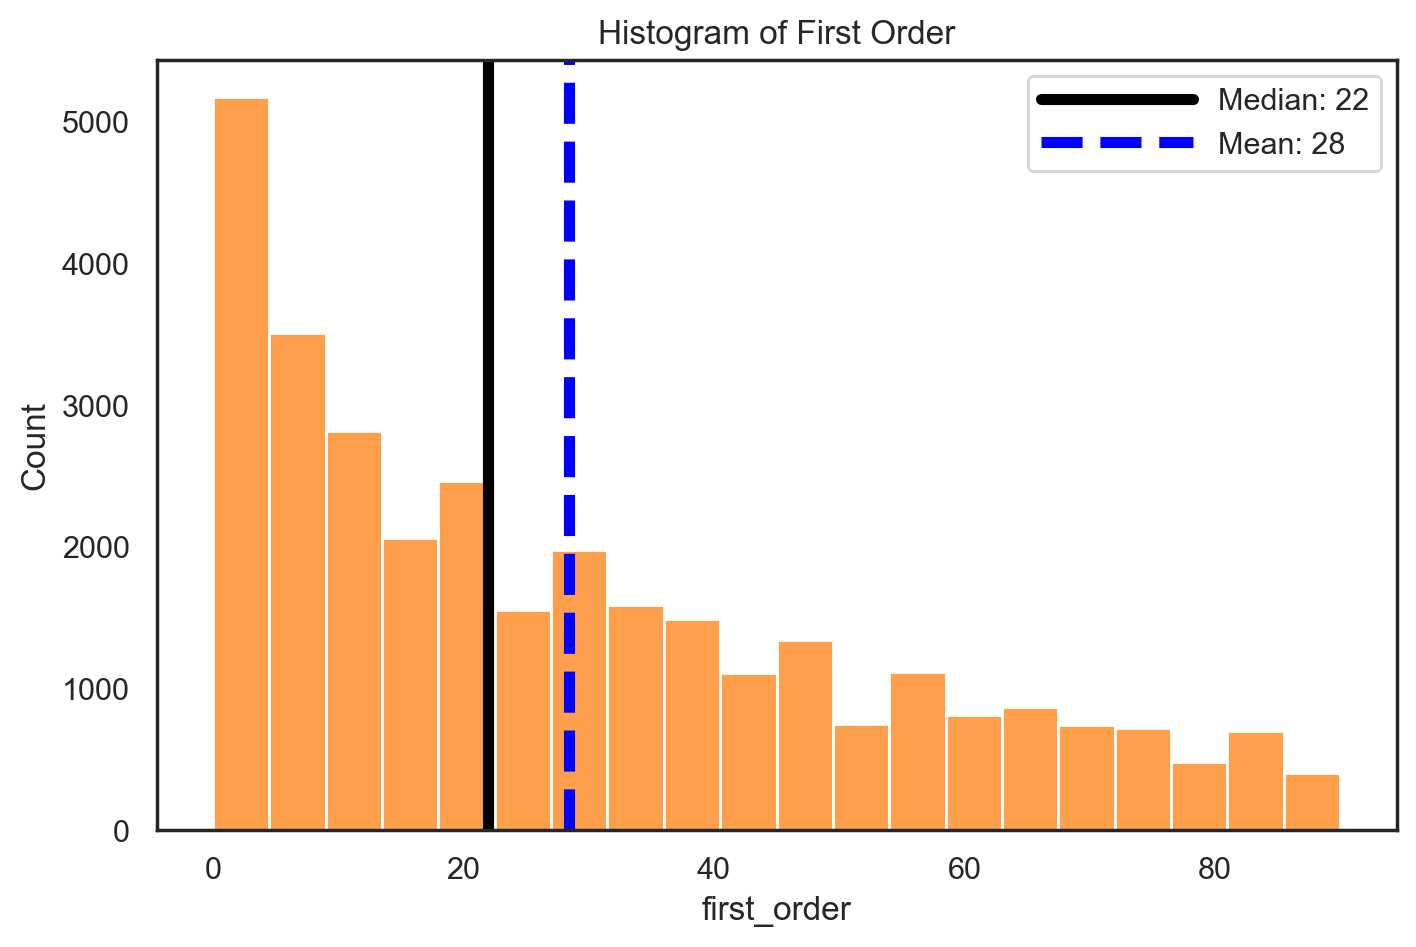

In [113]:
# Calculate statistics
median_age = np.median(df_first_order)
mean_age = np.mean(df_first_order)

# Set up the plot
sns.set_theme(style="white", palette=None)
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the histogram
sns.histplot(df['first_order'], bins=20, ax=ax, color='tab:orange')

# Add vertical lines for median and mean
ax.axvline(median_age, color='black', linewidth=4,
           label=f'Median: {int(median_age)}')
ax.axvline(mean_age, color='blue', linestyle='dashed', linewidth=4,
           label=f'Mean: {int(mean_age)}')

# Add legend and title
ax.legend(handlelength=5)
ax.set_title("Histogram of First Order")

# Show the plot
plt.show()

# Reset seaborn to default
sns.set()

For this feature, there's a visible difference between the median and mean values. We're going to fill in the missing values with the median, since it's more completely resistent to outliers.

In [114]:
df['first_order'] = df['first_order'].fillna(df['first_order'].median())

### **HR_0:**

We will substitute the missing values by the difference in total orders calculated with day of the week and hour of the day (we can do this because the DOW columns don't have any missing values), as we previously checked DOW total orders are always bigger or equal to HR total orders.

In [115]:
dow_columns = [f'DOW_{i}' for i in range(7)]
hr_columns = [f'HR_{i}' for i in range(24)]

# Checking if DOW total orders are always bigger or equal than HR total orders
len(df[df[dow_columns].sum(axis=1).astype(int) >= df[hr_columns].sum(axis=1).astype(int)]) == df.shape[0]

True

In [116]:
# Substituting missing values in HR_0 with the difference between DOW total orders and HR total orders
df['HR_0'] = df['HR_0'].fillna(df[dow_columns].sum(axis=1).astype(int) - df[hr_columns].sum(axis=1).astype(int))

In [117]:
# Checking if both ways of calculating total orders give the same result
df[dow_columns].sum(axis=1).astype(int).equals(df[hr_columns].sum(axis=1).astype(int))

True

HR_0 column is now coherent with the rest of the data.

### **customer_region:**

In [118]:
# Step 1: Calculate the mode of the 'customer_region' column
mode_value = df["customer_region"].mode()[0]
print(mode_value)

8670


In [119]:
# Step 2: Replace "-" with the mode value
df["customer_region"] = df["customer_region"].replace("-", mode_value)

We replaced the missing values in customer_region by the mode value, 8670. <br>

Now, no missing values should be present. Let's check them:

In [120]:
# Check if there are still missing values
pd.set_option('display.max_rows', None)  # Show all rows

# Count of missing values
df.isna().sum()

customer_region             0
customer_age                0
vendor_count                0
product_count               0
is_chain                    0
first_order                 0
last_order                  0
last_promo                  0
payment_method              0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
DOW_0                       0
DOW_1                       0
DOW_2                       0
DOW_3                       0
DOW_4                       0
DOW_5                       0
DOW_6                       0
HR_0                        0
HR_1                        0
HR_2      

##  4.2. First Outliers Treatment <a class="anchor" id="4.2"></a>

For the outlier removal, we are looking in depth into the boxplots to manually define thresholds.  

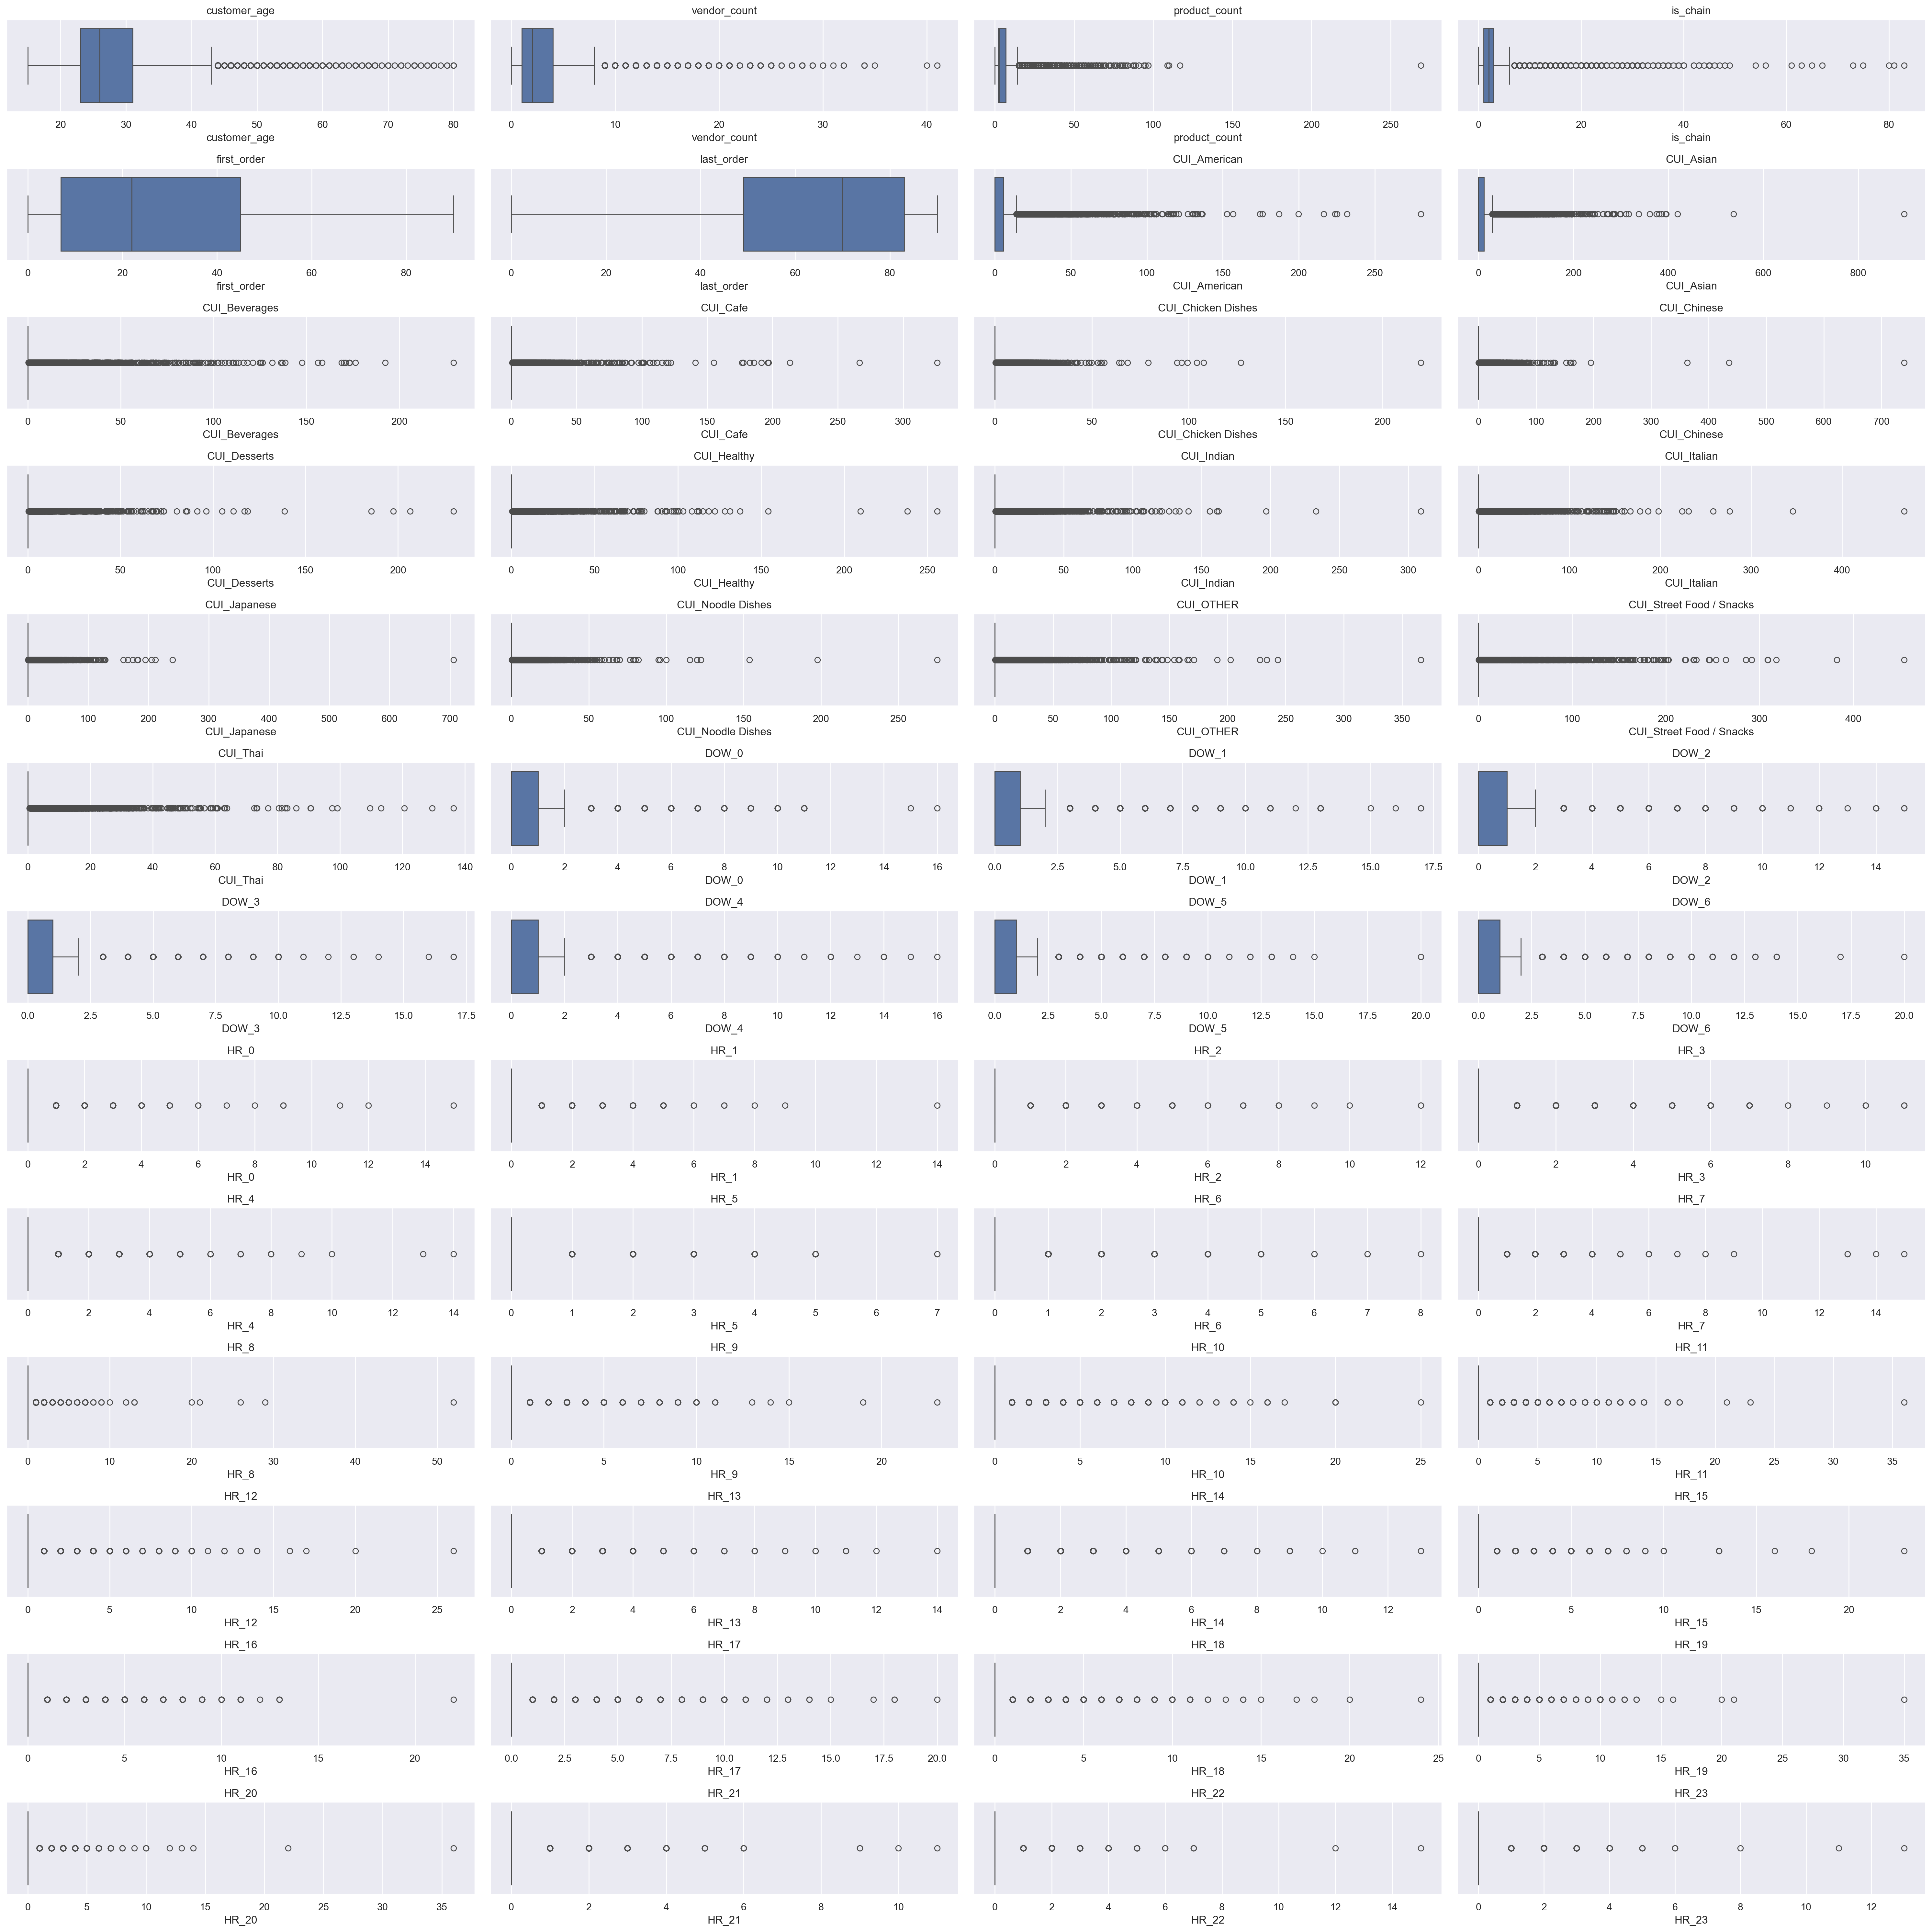

In [121]:
# Creating a 9x9 grid of subplots
fig, axes = plt.subplots(13, 4, figsize=(30, 30), tight_layout=True)

# Iterating across axes and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features):
    # Ensuring the column exists and is numeric
    if feat in df.columns and pd.api.types.is_numeric_dtype(df[feat]):
        sns.boxplot(x=df[feat], ax=ax)
        ax.set_title(feat)
    else:
        ax.set_title(f"{feat} (not numeric)")  
        ax.axis('off')  # Turning off the axis if it's not numeric

# Showing the plot
plt.show()

In [122]:
filters_man = (
    (df['customer_age']<= 50) 
    &
    (df['vendor_count']<= 30) 
    &
    (df['product_count']<= 70) 
    &
    (df['is_chain']<= 40) 
    &
    (df['customer_region'] != "8550")
    &
    (df['CUI_American']<= 95) 
    &
    (df['CUI_American']<= 200)
    &
    (df['CUI_American']<= 120) 
    &
    (df['CUI_Cafe']<= 120)
    &
    (df['CUI_American']<= 200)
    &
    (df['CUI_Chicken Dishes']<= 60)
    &
    (df['CUI_Chinese']<= 100)
    &
    (df['CUI_Desserts']<= 70)
    &
    (df['CUI_Healthy']<= 80)
    &
    (df['CUI_Indian']<= 100)
    &
    (df['CUI_Italian']<= 150)
    &
    (df['CUI_Japanese']<= 105)
    &
    (df['CUI_Noodle Dishes']<= 70)
    &
    (df['CUI_OTHER']<= 95)
    &
    (df["CUI_Street Food / Snacks"] <= 160)
    &
    (df["CUI_Thai"] <= 65)
    &
    (df["DOW_0"] <= 11)
    &
    (df["DOW_1"] <= 13)
    &
    (df["DOW_3"] <= 14)
    &
    (df["DOW_5"] <= 15)
    &
    (df["DOW_6"] <= 14)
)

df_man = df[filters_man]

We're not defining tresholds for HR_ columns, as their outliers are giving us relevant information that should be taken into consideration

In [123]:
print('Percentage of data kept after removing outliers:', np.round(df_man.shape[0] / df.shape[0], 4))

Percentage of data kept after removing outliers: 0.9771


We dropped less than 3% of our data by removing the outliers.

In [124]:
# Change the original Dataset
df = df[filters_man]

##  4.3. Feature Engineering <a class="anchor" id="4.3"></a>

In [125]:
# Week_days (Dow_0 to Dow_3) and Weekend_days (Dow_4 to Dow_6)
df['Week_days_mean'] = df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3']].mean(axis=1)
df['Weekend_days_mean'] = df[['DOW_4', 'DOW_5', 'DOW_6']].mean(axis=1)

In [126]:
# Lunch HR (HR_11 to HR_13) and Dinner HR (HR_18 to HR_20)
df["Morning_HR"] = df[["HR_1", 'HR_2', 'HR_3', "HR_4", "HR_5", 'HR_6', 'HR_7', "HR_8", "HR_9", "HR_10"]].mean(axis=1)
df['Lunch_HR'] = df[['HR_11', 'HR_12', 'HR_13']].mean(axis=1)
df["Afternoon_HR"] = df[["HR_14", "HR_15", 'HR_16', "HR_17"]].mean(axis=1)
df['Dinner_HR'] = df[['HR_18', 'HR_19', 'HR_20']].mean(axis=1)
df['Night_HR'] = df[["HR_21", 'HR_22', 'HR_23', "HR_0"]].mean(axis=1)

In [127]:
# Total Spend = Sum of all CUI_* columns
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]
df['Total_Spend'] = df[cuisine_columns].sum(axis=1)

In [128]:
# Average Spend per Vendor = Total Spend / vendor_count
df['Avg_Spend_per_Vendor'] = df['Total_Spend'] / df['vendor_count']

# Spend per Product = Total Spend / product_count
df['Spend_per_Product'] = df['Total_Spend'] / df['product_count']

In [129]:
# Cuisine Diversity = Number of non-zero CUI_* columns
df['Cuisine_Diversity'] = df[cuisine_columns].gt(0).sum(axis=1)

# Peak HR column for every customer
df['HR_peak'] = df.loc[:, 'HR_0':'HR_23'].idxmax(axis=1)

# Customer Duration = last_order - first_order
df["Customer_Duration"] = df["last_order"] - df["first_order"]

# Product Frequency = Customer Duration / product_count
df["Product_Frequency"] = df["Customer_Duration"] / df["product_count"]

# Favourite Cuisine = Cuisine with the highest spend
df['Fav_Cuisine'] = df[cuisine_columns].idxmax(axis=1)

# Favourite Cuisine Concentration = Max Cuisine Spend / Total Spend
df['Fav_Cuisine_Concentration'] = df[cuisine_columns].max(axis=1) / df['Total_Spend']

# Total Orders = Sum of all DOW_* columns
df['Total_Orders'] = df[dow_columns].sum(axis=1).astype(int)

# CUI_OTHER_Asian = CUI_Asian - Sum of the 4 main cuisines
df["CUI_OTHER_Asian"] = df["CUI_Asian"] - df[["CUI_Japanese", "CUI_Indian", "CUI_Chinese", "CUI_Thai"]].sum(axis=1)

# Chain preference = is_chain / Total_Orders
df['Chain_Preference'] = df['is_chain'] / df['Total_Orders']

# Average money spent per order = Total Spend / Total Orders
df['Avg_Spend_per_Order'] = df['Total_Spend'] / df['Total_Orders']

# Order Frequency = Total Orders / Customer Duration
df['Order_Frequency'] = df['Total_Orders'] / df['Customer_Duration']

# Peak Order Day = Day of the week with the most orders
df['Peak_Order_Day'] = df[dow_columns].idxmax(axis=1).apply(lambda x: int(x.split('_')[1]))

# Product Intensity = product_count / Customer Duration
df['Product_Intensity'] = df['product_count'] / df['Customer_Duration']
df['Product_Intensity'].fillna(0, inplace=True)  # Handling potential division by zero

# Repeat Customer: 1 if Customer Duration > 1, else 0
X = 1  # If more than 1 day then it's considered a repeat customer
df['Repeat_Customer'] = df['Customer_Duration'].apply(lambda x: 1 if x > X else 0)

# Churn Risk: 1 if days since last order > Threshold, else 0
threshold_days = 30  # Considering the max days is 90 then we decided 30 days would make sense as a threshold
df['Days_Since_Last_Order'] = df['last_order'].max() - df['last_order']  # Days since last order until the end of the dataset
df['Churn_Risk'] = df['Days_Since_Last_Order'].apply(lambda x: 1 if x > threshold_days else 0)
df.drop(columns=['Days_Since_Last_Order'], inplace=True)

##  4.4. Feature Selection <a class="anchor" id="4.4"></a>

It is intended to keep only the columns that gives us the most valuable insights. Most of the old features were used to build new ones that better characterize the customers. They were combined in such a way that the new features can capture the variance of the old ones. Therefore, most of the old features will be dropped to avoid redundancy and simplify the dataset.

* Dropping old features:

In [130]:
# dropping highly correlated columns
df.drop(columns=["vendor_count", "product_count", "is_chain", "last_order","first_order"] + dow_columns + hr_columns, inplace=True)

Let's check the correlation between numerical variables after this removal. The threshold of correlation will be 0.6.

In [131]:
numeric_features = list(df.select_dtypes(include=['number']))
correlation_matrix = df[numeric_features].corr()

# Set a correlation threshold
threshold = 0.6

# Get the absolute values of the correlation matrix
abs_corr_matrix = correlation_matrix.abs()

# Identify pairs with high correlation
high_corr_pairs = [
    (feature_1, feature_2, abs_corr_matrix.loc[feature_1, feature_2])
    for feature_1 in abs_corr_matrix.columns
    for feature_2 in abs_corr_matrix.columns
    if feature_1 != feature_2 and abs_corr_matrix.loc[feature_1, feature_2] > threshold
]

high_corr_pairs

[('CUI_Asian', 'Total_Spend', 0.6655323348979112),
 ('CUI_Asian', 'CUI_OTHER_Asian', 0.8660475152745698),
 ('Week_days_mean', 'Total_Spend', 0.6309678961960555),
 ('Week_days_mean', 'Cuisine_Diversity', 0.6680671933423992),
 ('Week_days_mean', 'Total_Orders', 0.8951300202917988),
 ('Weekend_days_mean', 'Cuisine_Diversity', 0.641215584982),
 ('Weekend_days_mean', 'Total_Orders', 0.8334284419104853),
 ('Morning_HR', 'Total_Spend', 0.6410911661705749),
 ('Lunch_HR', 'Total_Orders', 0.6267906353730971),
 ('Afternoon_HR', 'Total_Orders', 0.6121837223473795),
 ('Total_Spend', 'CUI_Asian', 0.6655323348979112),
 ('Total_Spend', 'Week_days_mean', 0.6309678961960555),
 ('Total_Spend', 'Morning_HR', 0.6410911661705749),
 ('Total_Spend', 'Total_Orders', 0.7032721203523211),
 ('Avg_Spend_per_Vendor', 'Spend_per_Product', 0.6048307077789002),
 ('Avg_Spend_per_Vendor', 'Avg_Spend_per_Order', 0.7620643215712277),
 ('Spend_per_Product', 'Avg_Spend_per_Vendor', 0.6048307077789002),
 ('Spend_per_Product'

After analysing the following pairs we decided to delete some of the new features, that could possibly give us some repeated information or less relevant.

In [132]:
# dropping highly correlated columns
df.drop(columns=["Week_days_mean", "Weekend_days_mean", "Spend_per_Product", "Cuisine_Diversity", "Product_Intensity", "Repeat_Customer", "Avg_Spend_per_Vendor"], inplace=True)

In [133]:
numeric_features = list(df.select_dtypes(include=['number']))
correlation_matrix = df[numeric_features].corr()

# Set a correlation threshold
threshold = 0.6

# Get the absolute values of the correlation matrix
abs_corr_matrix = correlation_matrix.abs()

# Identify pairs with high correlation
high_corr_pairs = [
    (feature_1, feature_2, abs_corr_matrix.loc[feature_1, feature_2])
    for feature_1 in abs_corr_matrix.columns
    for feature_2 in abs_corr_matrix.columns
    if feature_1 != feature_2 and abs_corr_matrix.loc[feature_1, feature_2] > threshold
]

high_corr_pairs

[('CUI_Asian', 'Total_Spend', 0.6655323348979112),
 ('CUI_Asian', 'CUI_OTHER_Asian', 0.8660475152745698),
 ('Morning_HR', 'Total_Spend', 0.6410911661705749),
 ('Lunch_HR', 'Total_Orders', 0.6267906353730971),
 ('Afternoon_HR', 'Total_Orders', 0.6121837223473795),
 ('Total_Spend', 'CUI_Asian', 0.6655323348979112),
 ('Total_Spend', 'Morning_HR', 0.6410911661705749),
 ('Total_Spend', 'Total_Orders', 0.7032721203523211),
 ('Customer_Duration', 'Product_Frequency', 0.6090073433978423),
 ('Customer_Duration', 'Total_Orders', 0.633154770763359),
 ('Product_Frequency', 'Customer_Duration', 0.6090073433978423),
 ('Total_Orders', 'Lunch_HR', 0.6267906353730971),
 ('Total_Orders', 'Afternoon_HR', 0.6121837223473795),
 ('Total_Orders', 'Total_Spend', 0.7032721203523211),
 ('Total_Orders', 'Customer_Duration', 0.633154770763359),
 ('CUI_OTHER_Asian', 'CUI_Asian', 0.8660475152745698)]

In [ ]:
numeric_features = list(df.select_dtypes(include=['number']))
correlation_matrix = df[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

# [TBD:] Need help selecting the rest of the features

##  4.5. Data Normalization <a class="anchor" id="4.4"></a>

Comparing MinMax scaler to the Normalization scaler:

In [ ]:
df_minmax = df.copy()

In [ ]:
# Re-define metric and non-metric features to include the new features
non_metric_features = ["customer_region", "last_promo", "payment_method", "HR_peak", "Fav_Cuisine", 
                          "Peak_Order_Day", "Repeat_Customer", "Churn_Risk"]
metric_features = df.columns.drop(non_metric_features).to_list()